Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [772]:
import pandas as pd
import numpy as np

Read files

In [773]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,ZWE,Africa,Zimbabwe,2021-01-05,17194.0,1365.0,552.714,418.0,34.0,8.429,1156.838,91.839,37.187,28.124,2.288,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4880.0,231834.0,15.598,0.328,2817.0,0.190,0.196,5.1,tests performed,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59126,ZWE,Africa,Zimbabwe,2021-01-06,17804.0,610.0,597.000,431.0,13.0,10.143,1197.880,41.042,40.167,28.998,0.875,0.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4696.0,236530.0,15.914,0.316,3136.0,0.211,0.190,5.3,tests performed,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59127,ZWE,Africa,Zimbabwe,2021-01-07,18675.0,871.0,686.857,446.0,15.0,11.857,1256.482,58.602,46.213,30.008,1.009,0.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59128,ZWE,Africa,Zimbabwe,2021-01-08,19660.0,985.0,796.571,468.0,22.0,14.143,1322.754,66.272,53.595,31.488,1.480,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [774]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59130 entries, 0 to 59129
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            58792 non-null  object 
 1   continent                           58437 non-null  object 
 2   location                            59130 non-null  object 
 3   date                                59130 non-null  object 
 4   total_cases                         58581 non-null  float64
 5   new_cases                           58574 non-null  float64
 6   new_cases_smoothed                  57619 non-null  float64
 7   total_deaths                        50188 non-null  float64
 8   new_deaths                          50187 non-null  float64
 9   new_deaths_smoothed                 57619 non-null  float64
 10  total_cases_per_million             58243 non-null  float64
 11  new_cases_per_million               58236

Convert date to number

In [775]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,ZWE,Africa,Zimbabwe,2021-01-05,17194.0,1365.0,552.714,418.0,34.0,8.429,1156.838,91.839,37.187,28.124,2.288,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4880.0,231834.0,15.598,0.328,2817.0,0.190,0.196,5.1,tests performed,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,05012021
59126,ZWE,Africa,Zimbabwe,2021-01-06,17804.0,610.0,597.000,431.0,13.0,10.143,1197.880,41.042,40.167,28.998,0.875,0.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4696.0,236530.0,15.914,0.316,3136.0,0.211,0.190,5.3,tests performed,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,06012021
59127,ZWE,Africa,Zimbabwe,2021-01-07,18675.0,871.0,686.857,446.0,15.0,11.857,1256.482,58.602,46.213,30.008,1.009,0.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,07012021
59128,ZWE,Africa,Zimbabwe,2021-01-08,19660.0,985.0,796.571,468.0,22.0,14.143,1322.754,66.272,53.595,31.488,1.480,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,08012021


Country

In [776]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Ko

In [777]:
print(len(list_country))

192


Get latest date

In [778]:
from datetime import date 
from datetime import timedelta

In [779]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-01-10


In [780]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-01-09


In [781]:
last_date = train.date.max()
last_date

Timestamp('2021-01-10 00:00:00')

In [782]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [783]:
yesterday = pd.Timestamp(yesterday)

In [784]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [785]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-01-09 00:00:00')

In [786]:
last_date = train[train.date == last_date]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
320,AFG,Asia,Afghanistan,2021-01-09,53400.0,68.0,267.714,2264.0,7.0,10.429,1371.751,1.747,6.877,58.158,0.180,0.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,09012021
627,ALB,Europe,Albania,2021-01-09,63033.0,655.0,577.429,1233.0,3.0,6.143,21903.190,227.604,200.649,428.452,1.042,2.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,09012021
947,DZA,Africa,Algeria,2021-01-09,101913.0,256.0,250.571,2803.0,5.0,4.857,2324.072,5.838,5.714,63.921,0.114,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,09012021
1261,AND,Europe,Andorra,2021-01-09,8586.0,97.0,60.000,85.0,1.0,0.143,111124.054,1255.420,776.548,1100.110,12.942,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,09012021
1557,AGO,Africa,Angola,2021-01-09,18156.0,90.0,78.286,416.0,1.0,1.286,552.420,2.738,2.382,12.657,0.030,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,09012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57905,VNM,Asia,Vietnam,2021-01-09,1513.0,1.0,4.429,35.0,0.0,0.000,15.544,0.010,0.045,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,09012021
58259,OWID_WRL,NaN,World,2021-01-09,89634318.0,773818.0,719955.143,1926624.0,13205.0,12961.714,11499.247,99.274,92.364,247.168,1.694,1.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23561169.0,NaN,0.3,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,09012021
58535,YEM,Asia,Yemen,2021-01-09,2104.0,0.0,0.429,610.0,0.0,0.000,70.543,0.000,0.014,20.452,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,09012021
58833,ZMB,Africa,Zambia,2021-01-09,26567.0,1241.0,762.429,464.0,23.0,10.286,1445.119,67.505,41.472,25.239,1.251,0.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,

Graphical representation

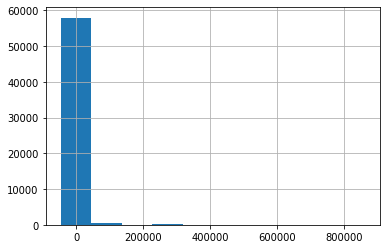

In [787]:
from matplotlib import pyplot as plt

train.new_cases.hist()

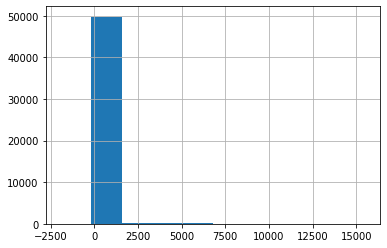

In [788]:
train.new_deaths.hist()

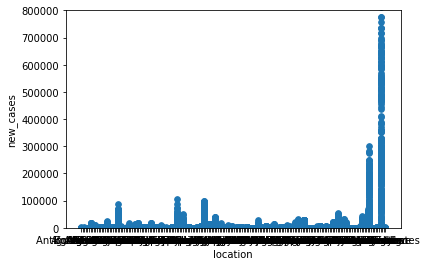

In [789]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,800000), s=32);

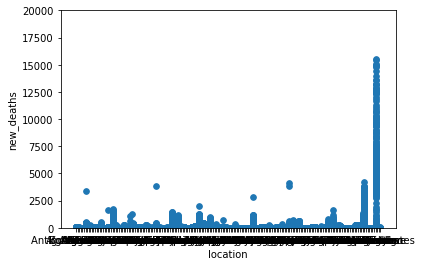

In [790]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,20000), s=32);

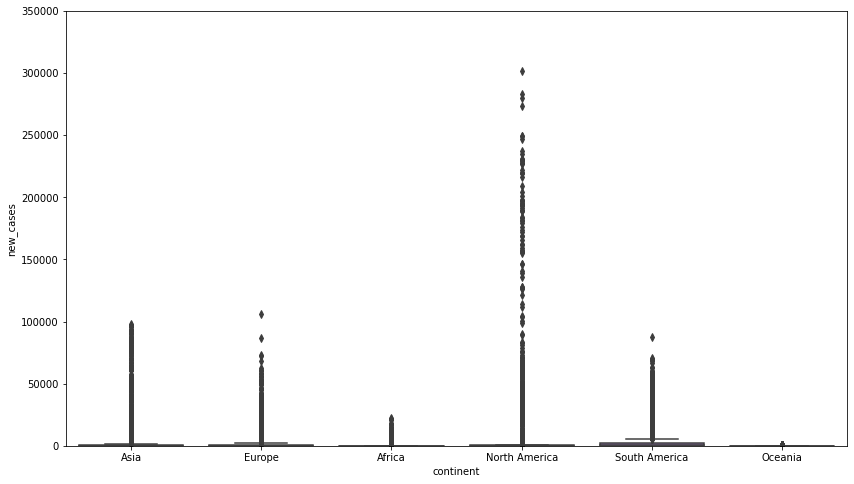

In [791]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=350000);

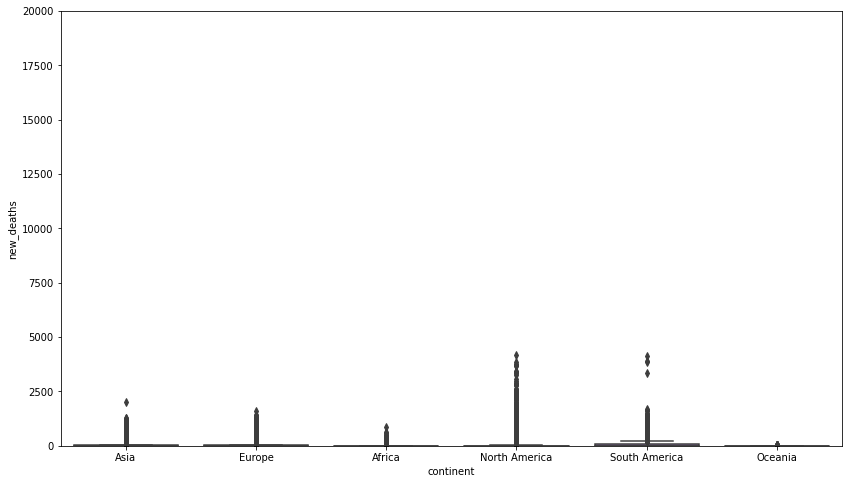

In [792]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

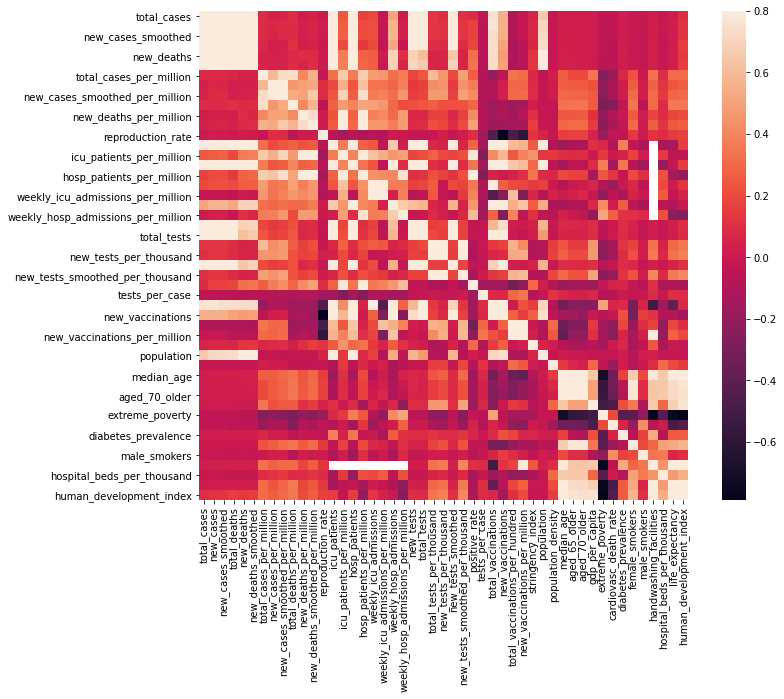

In [793]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [794]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
55577,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,31012020
55578,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,01022020
55579,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,02022020
55580,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,03022020
55581,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55917,GBR,Europe,United Kingdom,2021-01-05,2782709.0,61087.0,56106.571,76428.0,881.0,679.000,40990.909,899.847,826.482,1125.829,12.978,10.002,NaN,2645.0,38.962,30370.0,447.368,NaN,NaN,NaN,NaN,498624.0,54808079.0,807.355,7.345,453243.0,6.677,0.124,8.1,tests performed,NaN,NaN,NaN,NaN,75.00,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,05012021
55918,GBR,Europe,United Kingdom,2021-01-06,2845265.0,62556.0,57866.143,77470.0,1042.0,687.571,41912.395,921.486,852.402,1141.178,15.349,10.128,NaN,2821.0,41.555,NaN,NaN,NaN,NaN,NaN,NaN,557441.0,55378721.0,815.761,8.211,474353.0,6.987,0.122,8.2,tests performed,NaN,NaN,NaN,NaN,75.00,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,06012021
55919,GBR,Europe,United Kingdom,2021-01-07,2898052.0,52787.0,57403.000,78632.0,1162.0,715.714,42689.978,777.583,845.579,1158.295,17.117,10.543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619941.0,56003851.0,824.969,9.132,491966.0,7.247,0.117,8.6,tests performed,NaN,NaN,NaN,NaN,75.00,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,07012021
55920,GBR,Europe,United Kingdom,2021-01-08,2966244.0,68192.0,59507.857,79965.0,1333.0,818.286,43694.485,1004.507,876

Text(0, 0.5, 'uk_new_cases_per_million')

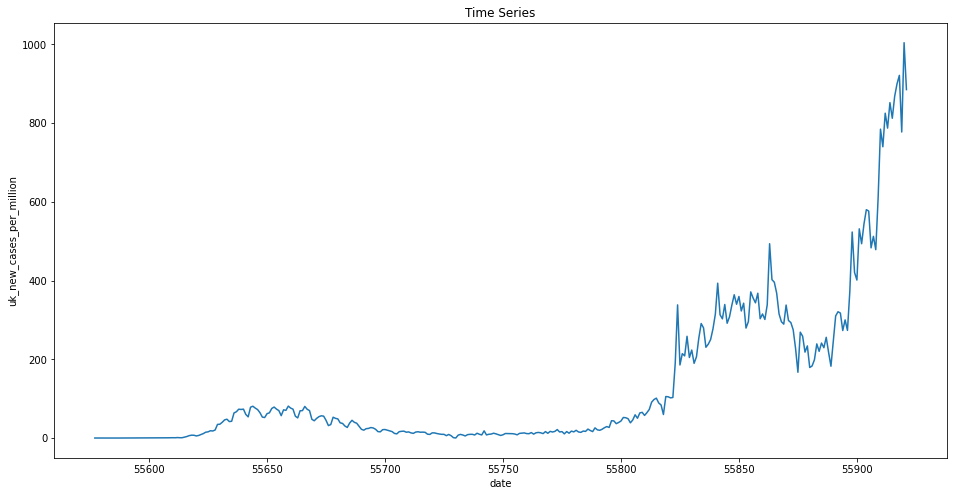

In [795]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

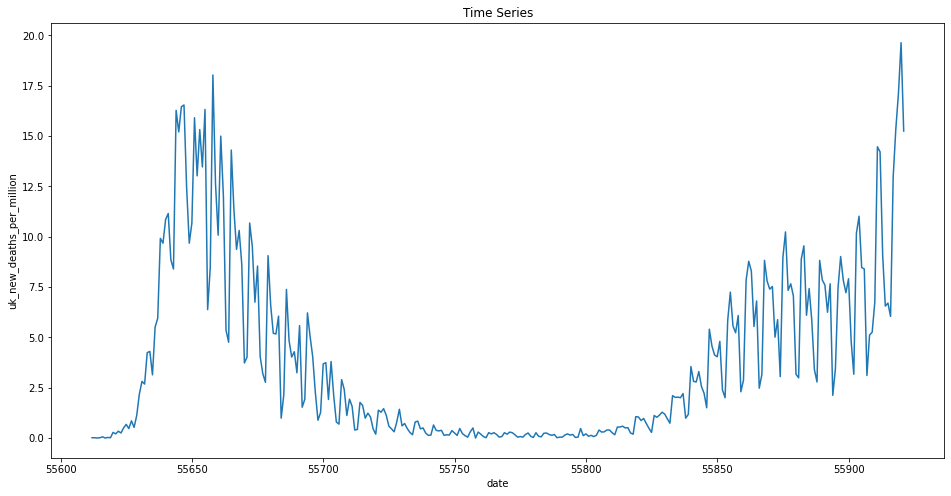

In [796]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [797]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
55922,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,22012020
55923,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,23012020
55924,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,24012020
55925,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,25012020
55926,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56271,USA,North America,United States,2021-01-05,21049605.0,230518.0,219327.429,357269.0,3767.0,2649.571,63593.464,696.423,662.615,1079.354,11.381,8.005,NaN,23512.0,71.033,131215.0,396.417,NaN,NaN,NaN,NaN,392751.0,251942935.0,761.151,1.187,945385.0,2.856,NaN,NaN,tests performed,4836469.0,339372.0,1.46,1025.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,05012021
56272,USA,North America,United States,2021-01-06,21299340.0,249735.0,221977.571,361123.0,3854.0,2666.286,64347.945,754.480,670.622,1090.997,11.643,8.055,NaN,23716.0,71.649,132464.0,400.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5306797.0,358887.0,1.60,1084.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,06012021
56273,USA,North America,United States,2021-01-07,21579569.0,280229.0,229286.429,365317.0,4194.0,2779.714,65194.551,846.607,692.703,1103.668,12.671,8.398,NaN,23821.0,71.966,132370.0,399.906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5919418.0,378253.0,1.79,1143.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,07012021
56274,USA,North America,United States,2021-01-08,21862773.0,283204.0,247245.5

Text(0, 0.5, 'us_new_cases_per_million')

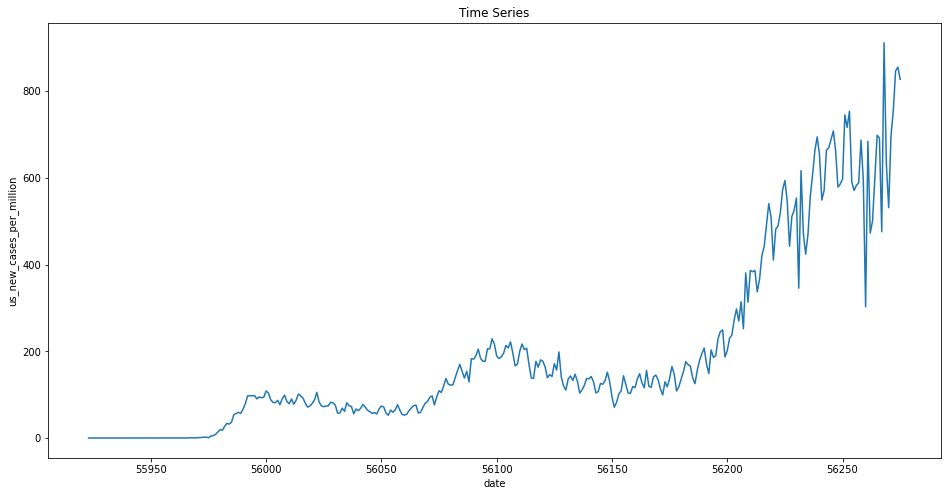

In [798]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

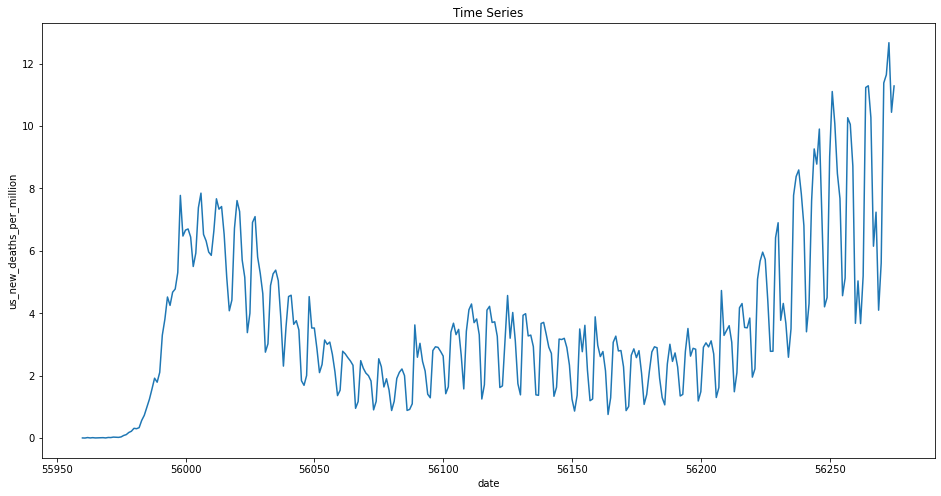

In [799]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

Spain

In [800]:
country = "Spain"

include_sp = train[train['location'].values == country]
exclude_sp = train[train['location'].values != country]
sp_cov19 = include_sp
sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
49521,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,01022020
49522,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.988,0.064,20.918,0.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,02022020
49523,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,03022020
49524,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,04022020
49525,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49860,ESP,Europe,Spain,2021-01-05,1982544.0,23700.0,12720.286,51430.0,352.0,141.143,42403.020,506.900,272.064,1099.994,7.529,3.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139339.0,56505.0,0.30,1209.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,05012021
49861,ESP,Europe,Spain,2021-01-06,1982544.0,0.0,10332.286,51430.0,0.0,105.857,42403.020,0.000,220.989,1099.994,0.000,2.264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45248.0,NaN,968.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,06012021
49862,ESP,Europe,Spain,2021-01-07,2024904.0,42360.0,13805.571,51675.0,245.0,119.714,43309.024,906.004,295.276,1105.235,5.240,2.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207323.0,41496.0,0.44,888.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,07012021
49863,ESP,Europe,Spain,2021-01-08,2050360.0,25456.0,17442.143,51874.0,199.0,148.143,43853.481,544.458,373.056,1109.491,4.256,3.169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277976.0,48786.0,0.59,1043.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,

Text(0, 0.5, 'spain_new_cases_per_million')

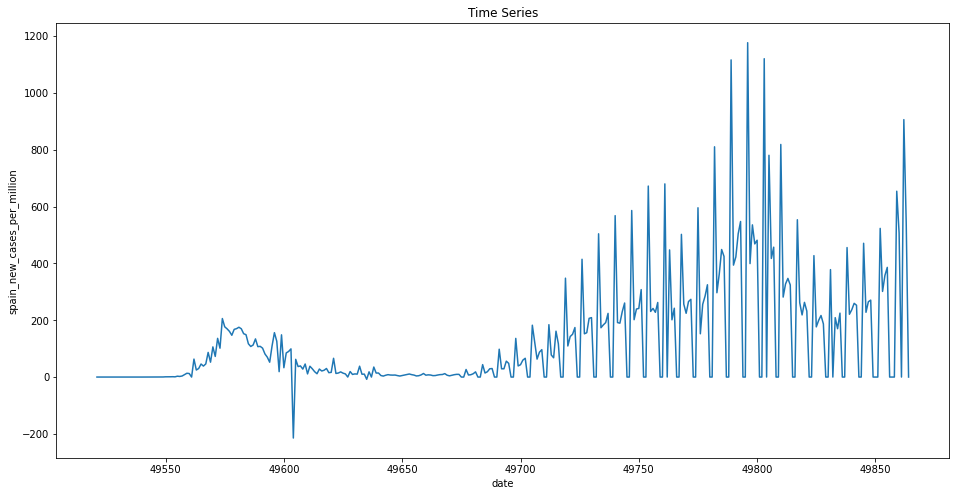

In [801]:
sp_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_cases_per_million")

Text(0, 0.5, 'spain_new_deaths_per_million')

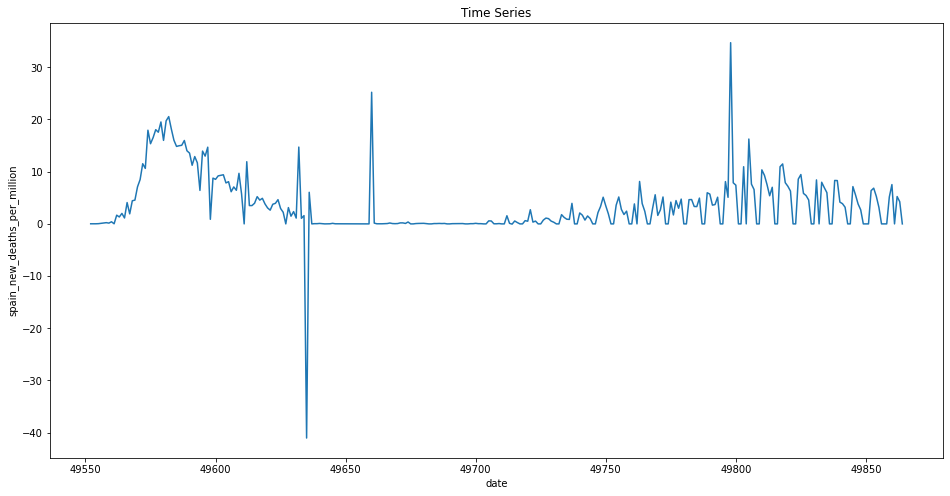

In [802]:
sp_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_deaths_per_million")

India

In [803]:
country = "India"

include_i = train[train['location'].values == country]
exclude_i = train[train['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
23854,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,30012020
23855,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,31012020
23856,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,01022020
23857,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,02022020
23858,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,03022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24195,IND,Asia,India,2021-01-05,10374932.0,18088.0,18582.857,150114.0,264.0,239.286,7518.043,13.107,13.466,108.778,0.191,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896236.0,176531997.0,127.921,0.649,961464.0,0.697,0.019,51.7,samples tested,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,05012021
24196,IND,Asia,India,2021-01-06,10395278.0,20346.0,18372.000,150336.0,222.0,228.286,7532.786,14.743,13.313,108.939,0.161,0.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,931408.0,177463405.0,128.596,0.675,934482.0,0.677,0.020,50.9,samples tested,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,06012021
24197,IND,Asia,India,2021-01-07,10413417.0,18139.0,20963.286,150570.0,234.0,261.714,7545.930,13.144,15.191,109.108,0.170,0.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,937590.0,178400995.0,129.276,0.679,907389.0,0.658,0.023,43.3,samples tested,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,07012021
24198,IND,Asia,India,2021-01-08,10413417.0,0.0,18101.143,150570.0,0.0,225.143,7545.930,0.000,13.117,109.108,0.000,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5

Text(0, 0.5, 'us_new_cases_per_million')

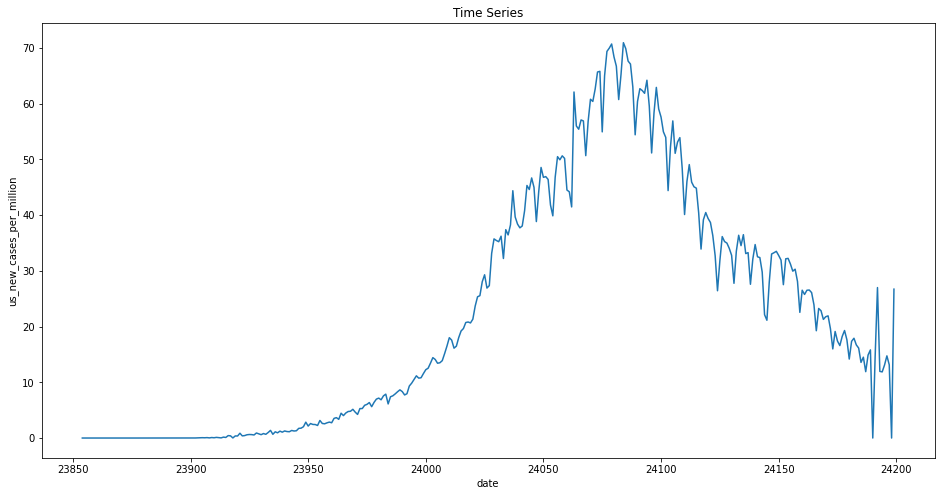

In [804]:
i_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

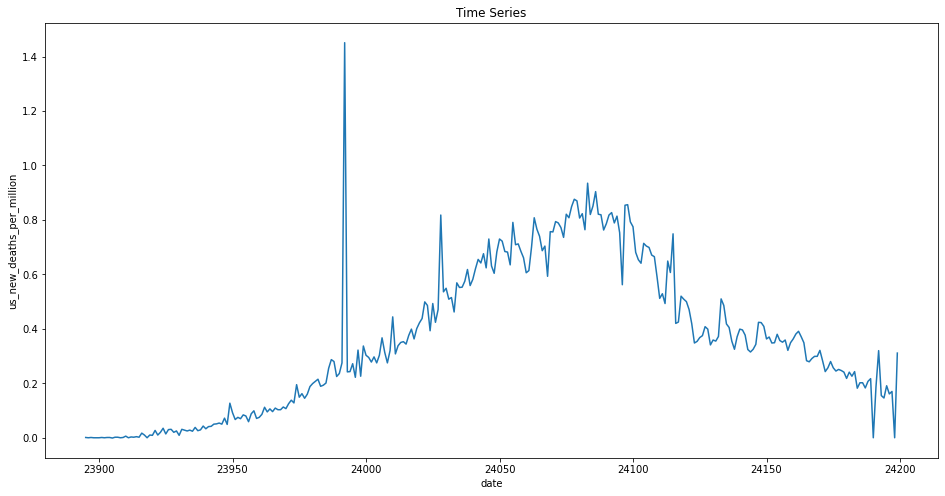

In [805]:
i_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [806]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10983,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,22012020
10984,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,23012020
10985,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,24012020
10986,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,25012020
10987,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,CHN,Asia,China,2021-01-05,96310.0,64.0,73.286,4787.0,0.0,1.429,66.913,0.044,0.051,3.326,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410714.0,NaN,285.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,05012021
11333,CHN,Asia,China,2021-01-06,96398.0,88.0,74.571,4788.0,1.0,1.000,66.975,0.061,0.052,3.327,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455357.0,NaN,316.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,06012021
11334,CHN,Asia,China,2021-01-07,96484.0,86.0,74.429,4788.0,0.0,0.857,67.034,0.060,0.052,3.327,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,347.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,07012021
11335,CHN,Asia,China,2021-01-08,96562.0,78.0,77.000,4789.0,1.0,1.000,67.088,0.054,0.053,3.327,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,347.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,08012021


Text(0, 0.5, 'china_new_cases_per_million')

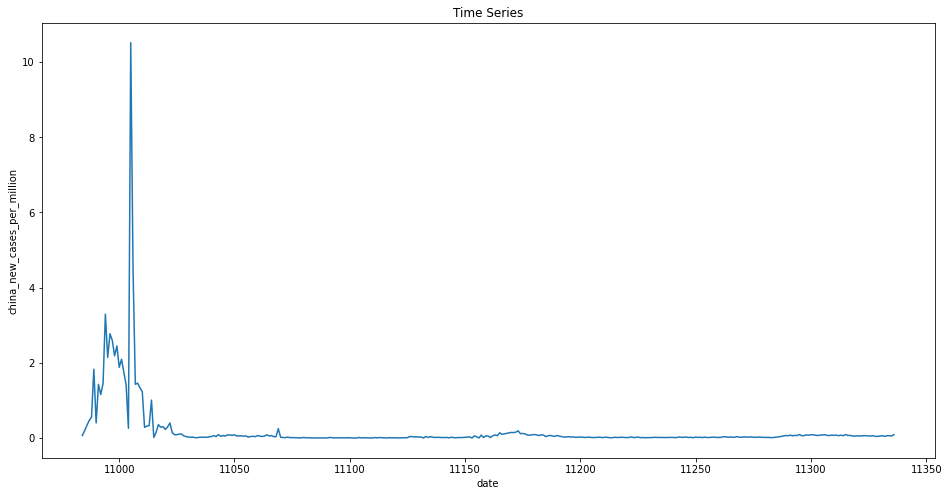

In [807]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

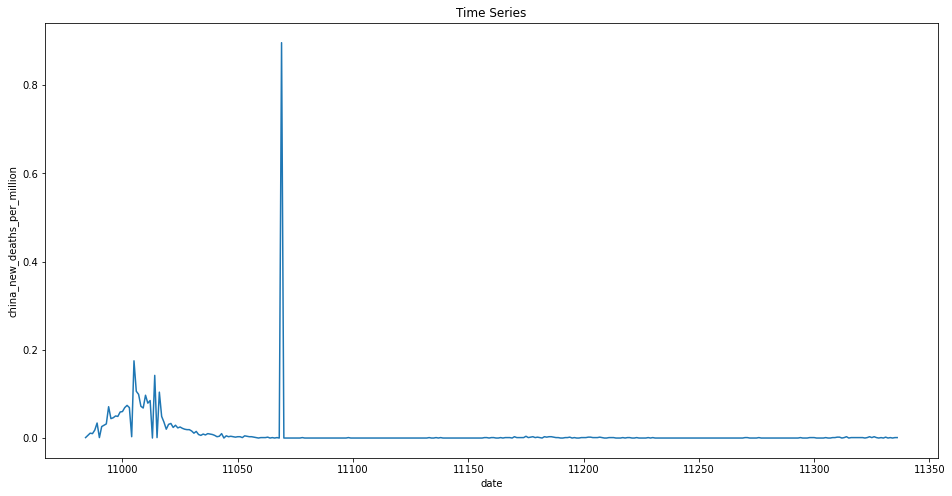

In [808]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [809]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
51809,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16012020
51810,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17012020
51811,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18012020
51812,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,19012020
51813,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,13.89,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,20012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52164,TWN,Asia,Taiwan,2021-01-05,817.0,2.0,3.143,7.0,0.0,0.0,34.304,0.084,0.132,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.0,129383.0,5.432,0.025,511.0,0.021,0.006,162.6,people tested,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,05012021
52165,TWN,Asia,Taiwan,2021-01-06,819.0,2.0,3.143,7.0,0.0,0.0,34.388,0.084,0.132,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,807.0,130190.0,5.466,0.034,530.0,0.022,0.006,168.6,people tested,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,06012021
52166,TWN,Asia,Taiwan,2021-01-07,822.0,3.0,3.286,7.0,0.0,0.0,34.513,0.126,0.138,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,130891.0,5.496,0.029,557.0,0.023,0.006,169.5,people tested,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,07012021
52167,TWN,Asia,Taiwan,2021-01-08,825.0,3.0,3.286,7.0,0.0,0.0,34.639,0.126,0.138,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,08012021


Text(0, 0.5, 'taiwan_new_cases_per_million')

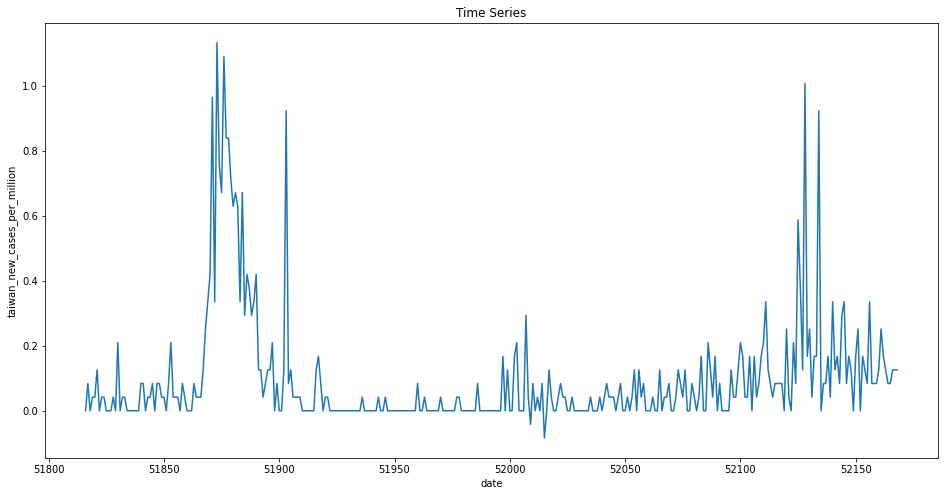

In [810]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

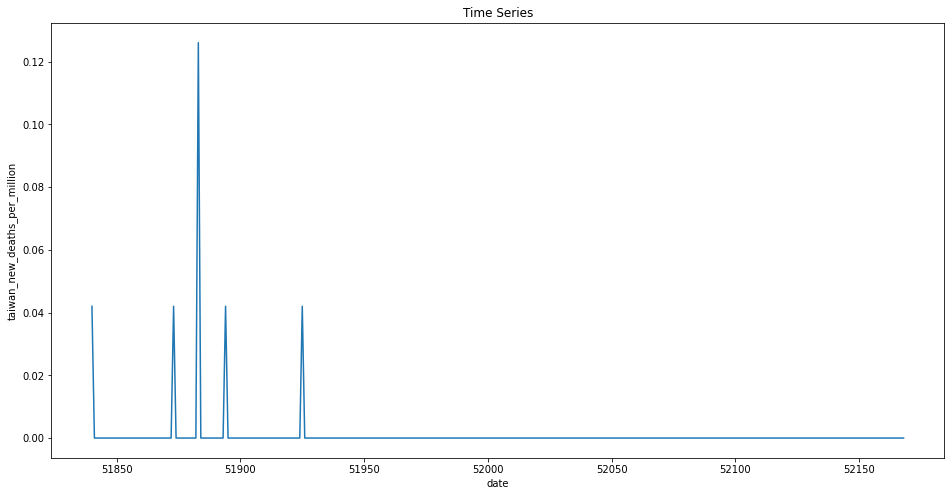

In [811]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

Japan

In [812]:
country = "Japan"

include_j = train[train['location'].values == country]
exclude_j = train[train['location'].values != country]
j_cov19 = include_j
j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
26816,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,22012020
26817,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,23012020
26818,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,24012020
26819,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,25012020
26820,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,JPN,Asia,Japan,2021-01-05,253571.0,4946.0,3736.571,3548.0,76.0,50.286,2004.887,39.106,29.544,28.053,0.601,0.398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88446.0,4713610.0,37.269,0.699,41077.0,0.325,0.091,11.0,people tested,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,05012021
27166,JPN,Asia,Japan,2021-01-06,259521.0,5950.0,4035.714,3609.0,61.0,52.286,2051.931,47.044,31.909,28.535,0.482,0.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73967.0,4787577.0,37.854,0.585,48634.0,0.385,0.083,12.1,people tested,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,06012021
27167,JPN,Asia,Japan,2021-01-07,267084.0,7563.0,4467.571,3674.0,65.0,54.571,2111.729,59.798,35.323,29.049,0.514,0.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81440.0,4869017.0,38.497,0.644,54614.0,0.432,0.082,12.2,people tested,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,07012021
27168,JPN,Asia,Japan,2021-01-08,274947.0,7863.0,5125.571,3746.0,72.0,57.714,2173.899,62.170,40.526,29.618,0.569,0.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.

Text(0, 0.5, 'japan_new_cases_per_million')

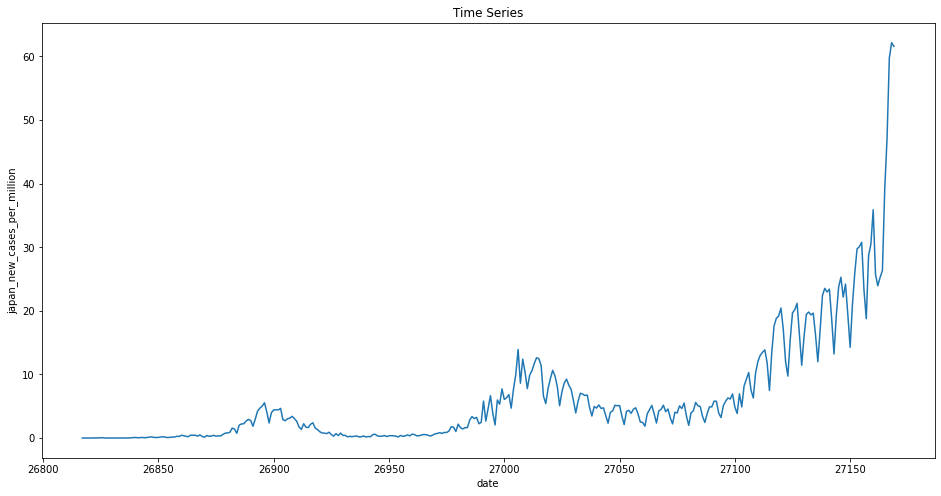

In [813]:
j_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_cases_per_million")

Text(0, 0.5, 'japan_new_deaths_per_million')

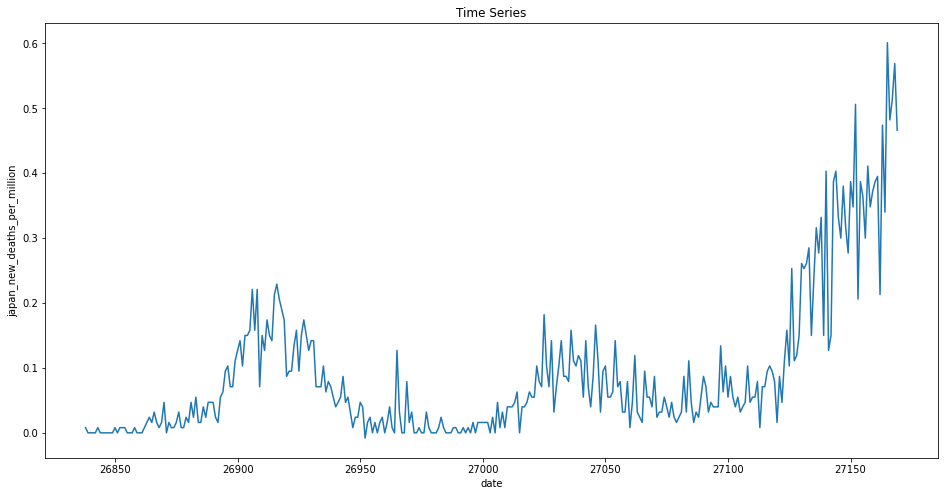

In [814]:
j_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_deaths_per_million")

New Zealand

In [815]:
country = "New Zealand"

include_nz = train[train['location'].values == country]
exclude_nz = train[train['location'].values != country]
nz_cov19 = include_nz
nz_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
37802,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.207,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,28022020
37803,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,29022020
37804,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,0.047,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,01032020
37805,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,254.0,0.053,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,02032020
37806,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,280.0,0.058,0.005,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38114,NZL,Oceania,New Zealand,2021-01-05,2186.0,0.0,5.000,25.0,0.0,0.0,453.317,0.000,1.037,5.184,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1419361.0,294.337,NaN,2918.0,0.605,0.002,583.6,tests performed,NaN,NaN,NaN,NaN,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,05012021
38115,NZL,Oceania,New Zealand,2021-01-06,2188.0,2.0,3.714,25.0,0.0,0.0,453.732,0.415,0.770,5.184,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2954.0,0.613,0.001,795.4,tests performed,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,06012021
38116,NZL,Oceania,New Zealand,2021-01-07,2188.0,0.0,3.714,25.0,0.0,0.0,453.732,0.000,0.770,5.184,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426787.0,295.877,NaN,2990.0,0.620,0.001,805.1,tests performed,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917,07012021
38117,NZL,Oceania,New Zealand,2021-01-08,2188.0,0.0,3.714,25.0,0.0,0.0,453.732,0.000,0.770,5.184,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2

Text(0, 0.5, 'new_zealand_new_cases_per_million')

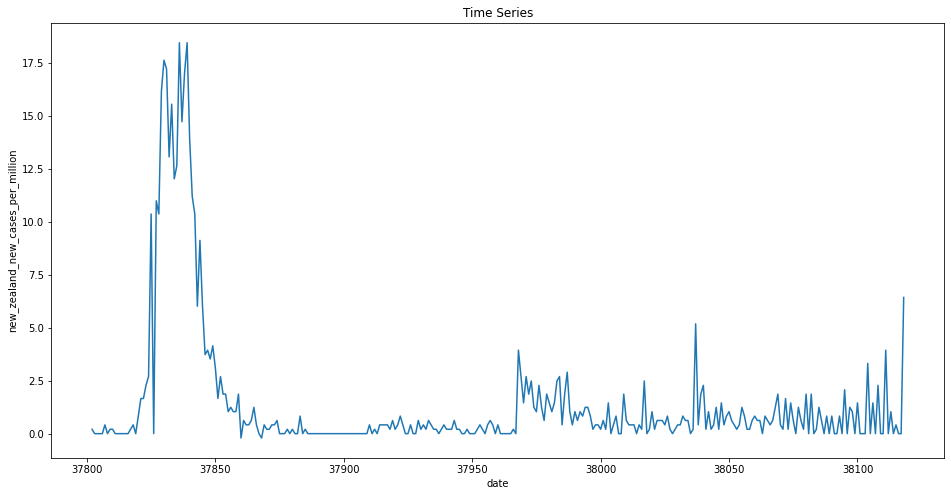

In [816]:
nz_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_cases_per_million")

Text(0, 0.5, 'new_zealand_new_deaths_per_million')

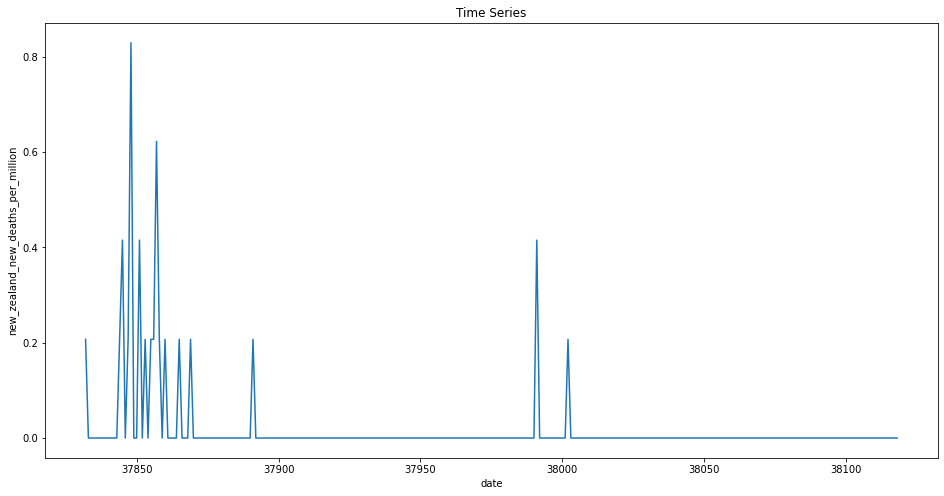

In [817]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_deaths_per_million")

Australia

In [818]:
country = "Australia"

include_a = train[train['location'].values == country]
exclude_a = train[train['location'].values != country]
a_cov19 = include_a
a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
2551,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,26012020
2552,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,27012020
2553,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,28012020
2554,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,0.235,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,29012020
2555,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,0.353,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,30012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,AUS,Oceania,Australia,2021-01-05,28536.0,19.0,22.143,909.0,0.0,0.0,1119.064,0.745,0.868,35.647,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84675.0,11590672.0,454.538,3.321,60967.0,2.391,0.0,2753.3,tests performed,NaN,NaN,NaN,NaN,65.28,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,05012021
2897,AUS,Oceania,Australia,2021-01-06,28546.0,10.0,20.143,909.0,0.0,0.0,1119.456,0.392,0.790,35.647,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101274.0,11691946.0,458.510,3.972,69656.0,2.732,0.0,3458.1,tests performed,NaN,NaN,NaN,NaN,65.28,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,06012021
2898,AUS,Oceania,Australia,2021-01-07,28571.0,25.0,20.857,909.0,0.0,0.0,1120.437,0.980,0.818,35.647,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87889.0,11779835.0,461.956,3.447,74171.0,2.909,0.0,3556.2,tests performed,NaN,NaN,NaN,NaN,65.28,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,07012021
2899,AUS,Oceania,Australia,2021-01-08,28582.0,11.0,17.429,909.0,0.0,0.0,1120.868,0.431,0.683,35.647,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.

Text(0, 0.5, 'australia_new_cases_per_million')

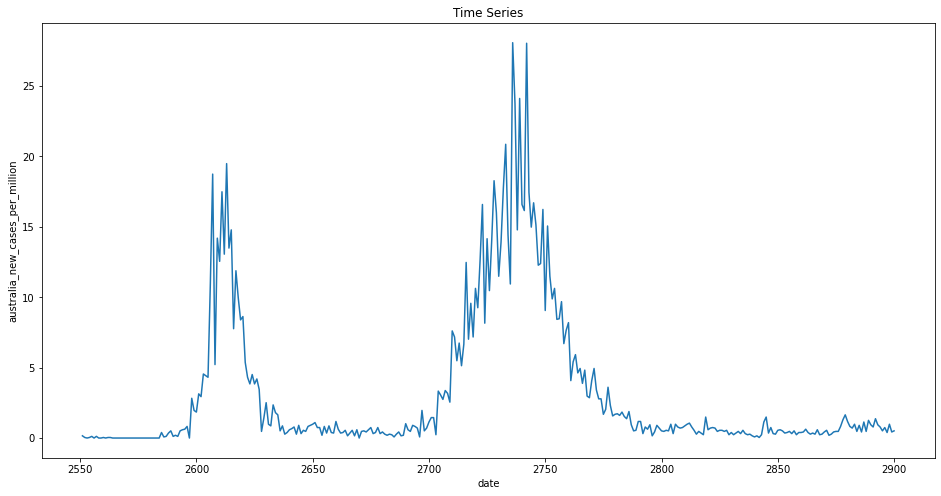

In [819]:
a_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_cases_per_million")

Text(0, 0.5, 'australia_new_deaths_per_million')

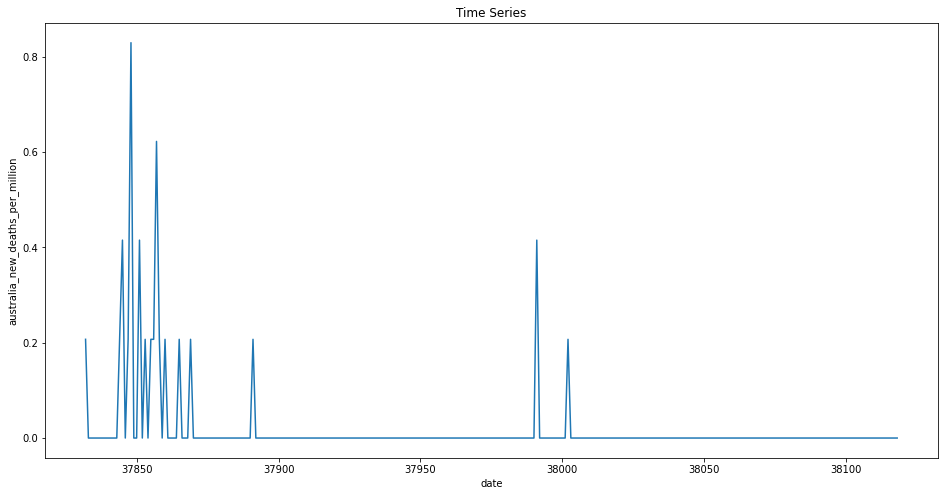

In [820]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_deaths_per_million")

South Africa

In [821]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
48548,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,07022020
48549,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,08022020
48550,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,09022020
48551,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,10022020
48552,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,ZAF,Africa,South Africa,2021-01-05,1127759.0,14410.0,15186.857,30524.0,513.0,422.286,19015.072,242.966,256.065,514.663,8.650,7.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47875.0,6828147.0,115.129,0.807,46809.0,0.789,0.324,3.1,people tested,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,05012021
48882,ZAF,Africa,South Africa,2021-01-06,1149591.0,21832.0,15775.714,31368.0,844.0,476.429,19383.180,368.108,265.993,528.894,14.231,8.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70060.0,6898207.0,116.310,1.181,49207.0,0.830,0.321,3.1,people tested,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,06012021
48883,ZAF,Africa,South Africa,2021-01-07,1170590.0,20999.0,16204.143,31809.0,441.0,477.143,19737.243,354.063,273.217,536.329,7.436,8.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69271.0,6967478.0,117.478,1.168,51181.0,0.863,0.317,3.2,people tested,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,07012021
48884,ZAF,Africa,South Africa,2021-01-08,1192570.0,21980.0,16954.714,32425.0,616.0,505.429,20107.846,370.603,285.872,546.716,10.386,8.522,NaN,NaN,NaN,NaN,NaN,

Text(0, 0.5, 'sa_new_cases_per_million')

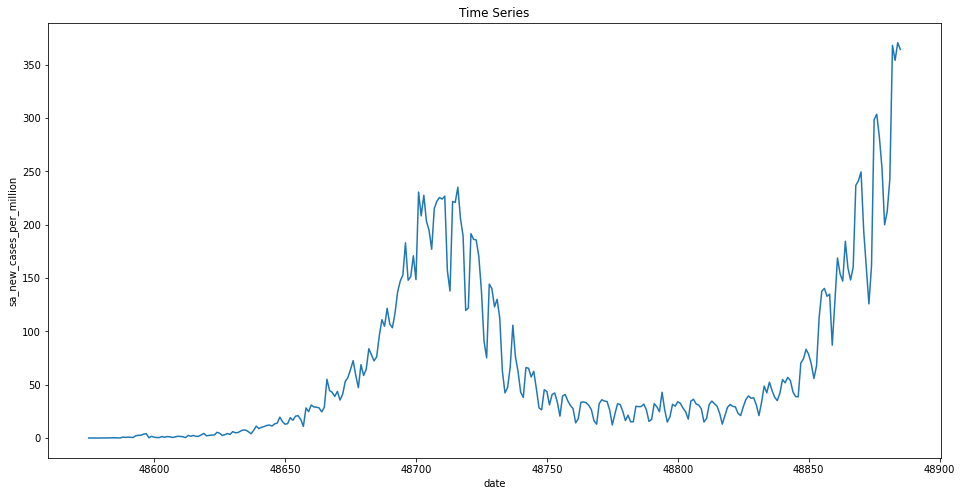

In [822]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

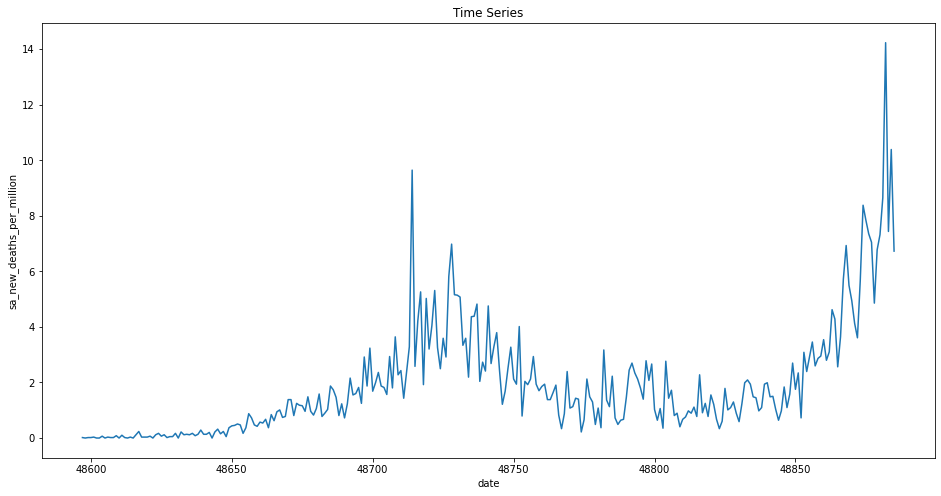

In [823]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [824]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
38712,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,28022020
38713,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,29022020
38714,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,01032020
38715,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,02032020
38716,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39024,NGA,Africa,Nigeria,2021-01-05,92705.0,1354.0,1020.714,1319.0,1.0,7.429,449.720,6.568,4.952,6.399,0.005,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21135.0,980046.0,4.754,0.103,6048.0,0.029,0.169,5.9,samples tested,NaN,NaN,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,05012021
39025,NGA,Africa,Nigeria,2021-01-06,94369.0,1664.0,1113.286,1324.0,5.0,6.571,457.792,8.072,5.401,6.423,0.024,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7697.0,0.037,0.145,6.9,samples tested,NaN,NaN,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,06012021
39026,NGA,Africa,Nigeria,2021-01-07,95934.0,1565.0,1189.571,1330.0,6.0,5.857,465.384,7.592,5.771,6.452,0.029,0.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1004915.0,4.875,NaN,8124.0,0.039,0.146,6.8,samples tested,NaN,NaN,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,07012021
39027,NGA,Africa,Nigeria,2021-01-08,97478.0,1544.0,1270.143,1342.0,12.0,6.857,472.874,7.490,6.162,6.510,0.058,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6669.0,1011584.0,4.907,0.032,8725.0,0.042,NaN,NaN,samples tested,NaN,NaN,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8

Text(0, 0.5, 'n_new_cases_per_million')

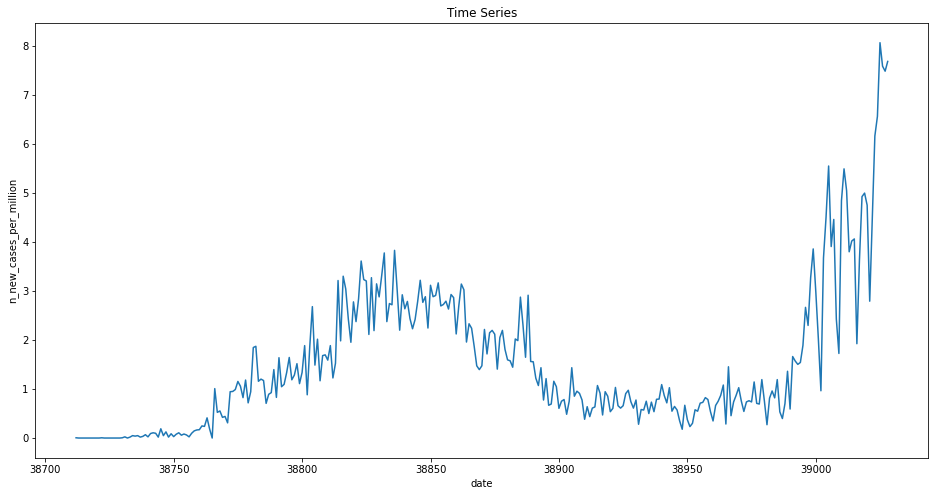

In [825]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

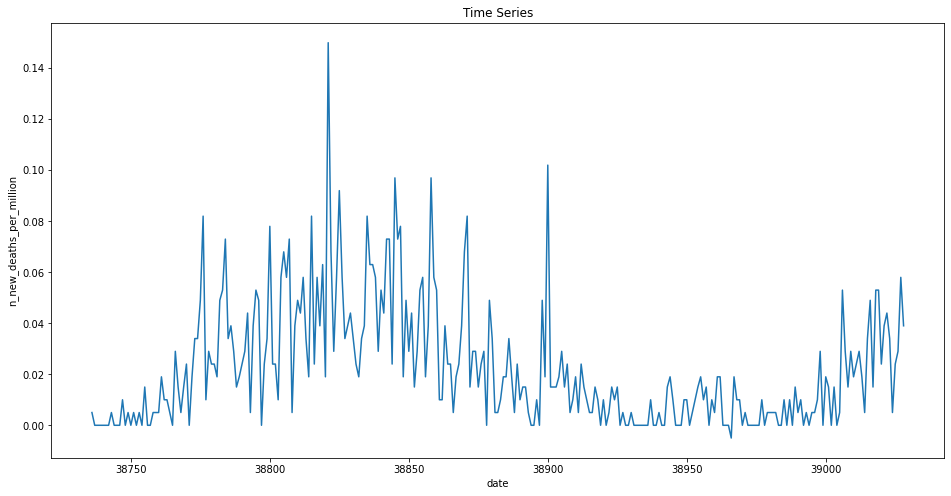

In [826]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [827]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
50819,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,01022020
50820,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,02022020
50821,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,03022020
50822,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,04022020
50823,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51158,SWE,Europe,Sweden,2021-01-05,469748.0,32369.0,5887.857,8985.0,258.0,71.571,46513.065,3205.083,582.998,889.668,25.546,7.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,05012021
51159,SWE,Europe,Sweden,2021-01-06,469748.0,0.0,4624.143,8985.0,0.0,36.857,46513.065,0.000,457.869,889.668,0.000,3.649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,06012021
51160,SWE,Europe,Sweden,2021-01-07,482284.0,12536.0,6415.000,9262.0,277.0,76.429,47754.343,1241.278,635.194,917.096,27.428,7.568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,07012021
51161,SWE,Europe,Sweden,2021-01-08,489471.0,7187.0,7441.714,9433.0,171.0,100.857,48465.978,711.636,736.857,934.028,16.932,9.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,08012021


Text(0, 0.5, 'sweden_new_cases_per_million')

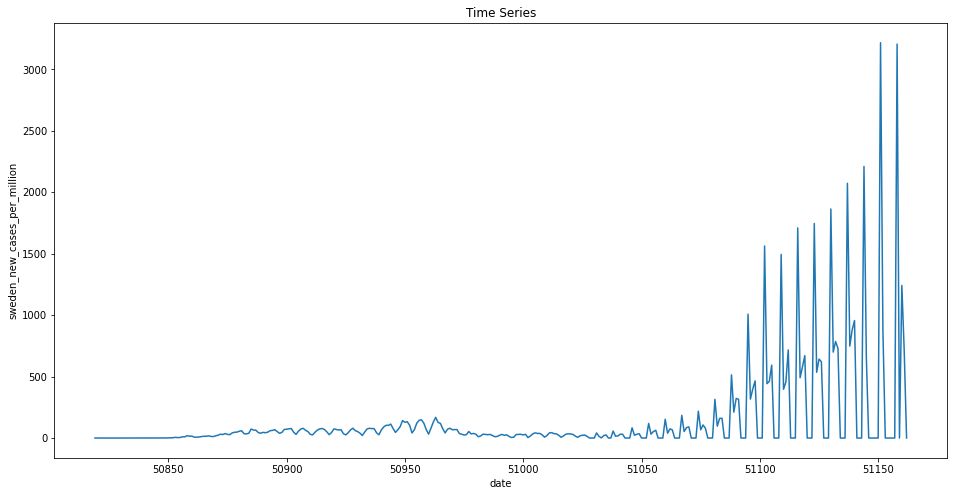

In [828]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

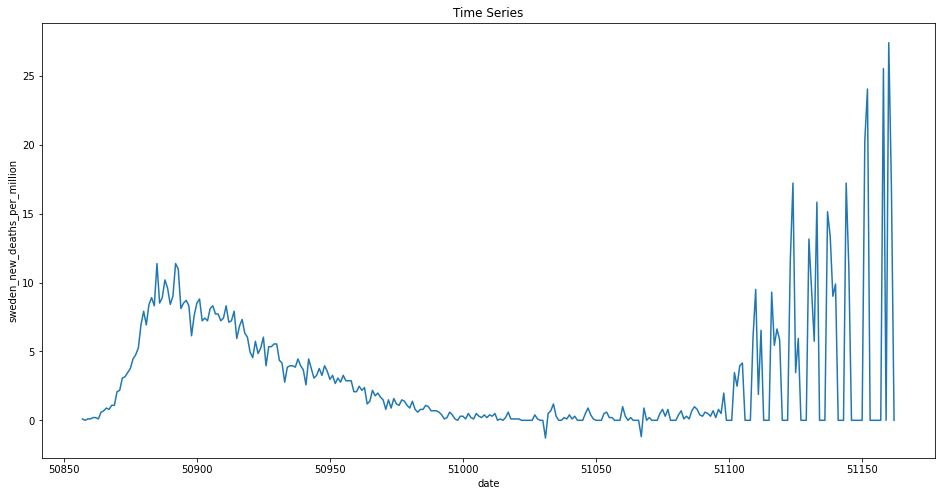

In [829]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [830]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
14373,DNK,Europe,Denmark,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,27012020
14374,DNK,Europe,Denmark,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,28012020
14375,DNK,Europe,Denmark,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,29012020
14376,DNK,Europe,Denmark,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,30012020
14377,DNK,Europe,Denmark,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,31012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14717,DNK,Europe,Denmark,2021-01-05,173433.0,1997.0,2051.286,1420.0,31.0,27.714,29942.493,344.774,354.146,245.157,5.352,4.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104571.0,10885320.0,1879.306,18.054,75065.0,12.960,0.027,36.6,tests performed,67924.0,7216.0,1.17,1246.0,67.59,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,05012021
14718,DNK,Europe,Denmark,2021-01-06,175663.0,2230.0,1971.571,1451.0,31.0,27.857,30327.494,385.000,340.384,250.509,5.352,4.809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91814.0,10977134.0,1895.157,15.851,72356.0,12.492,0.027,36.7,tests performed,87502.0,8382.0,1.51,1447.0,67.59,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,06012021
14719,DNK,Europe,Denmark,2021-01-07,177507.0,1844.0,1913.000,1488.0,37.0,27.143,30645.853,318.359,330.272,256.897,6.388,4.686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20454.0,10997588.0,1898.688,3.531,70394.0,12.153,0.027,36.8,tests performed,104693.0,9938.0,1.81,1716.0,67.59,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,07012021
14720,DNK,Europe,Denmark,2021-01-08,179170.0,1663.0,1800.429,1518.0,30.0,28.000,30932.963,287.110,310.837,262.076,5.179,4.834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Text(0, 0.5, 'denmark_new_cases_per_million')

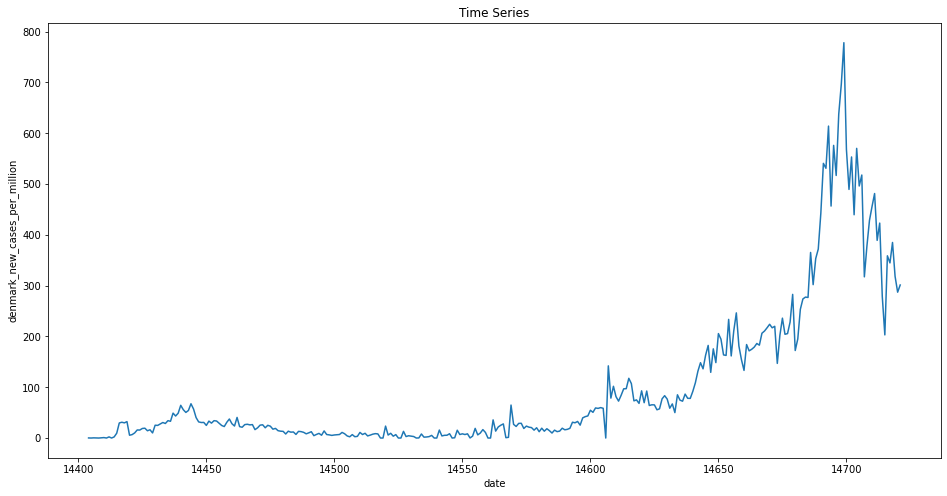

In [831]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

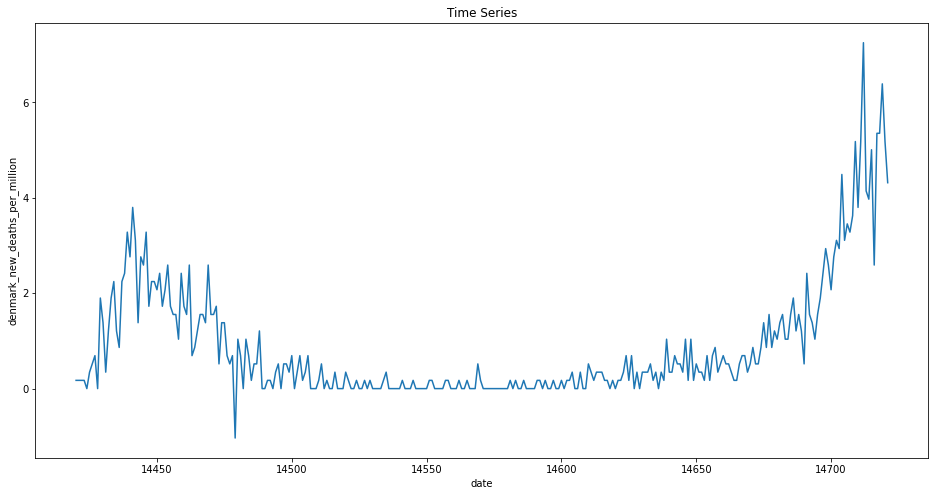

In [832]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

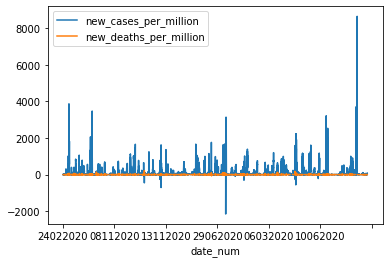

In [833]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

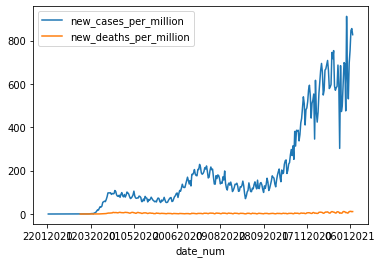

In [834]:
us_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

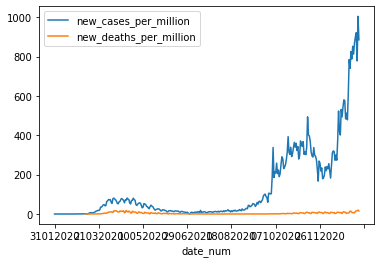

In [835]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

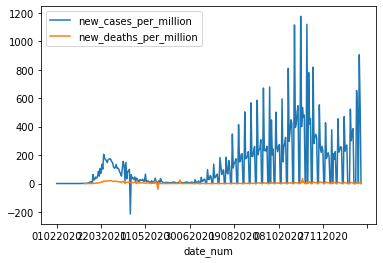

In [836]:
sp_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [837]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
55605,GBR,Europe,United Kingdom,2020-02-28,56.0,12.0,4.714,NaN,NaN,0.000,0.825,0.177,0.069,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,28022020
55606,GBR,Europe,United Kingdom,2020-02-29,61.0,5.0,5.429,NaN,NaN,0.000,0.899,0.074,0.080,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,29022020
55607,GBR,Europe,United Kingdom,2020-03-01,94.0,33.0,9.429,NaN,NaN,0.000,1.385,0.486,0.139,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,01032020
55608,GBR,Europe,United Kingdom,2020-03-02,134.0,40.0,14.857,NaN,NaN,0.000,1.974,0.589,0.219,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,02032020
55609,GBR,Europe,United Kingdom,2020-03-03,189.0,55.0,22.143,NaN,NaN,0.000,2.784,0.810,0.326,NaN,NaN,0.000,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55917,GBR,Europe,United Kingdom,2021-01-05,2782709.0,61087.0,56106.571,76428.0,881.0,679.000,40990.909,899.847,826.482,1125.829,12.978,10.002,NaN,2645.0,38.962,30370.0,447.368,NaN,NaN,NaN,NaN,498624.0,54808079.0,807.355,7.345,453243.0,6.677,0.124,8.1,tests performed,NaN,NaN,NaN,NaN,75.00,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,05012021
55918,GBR,Europe,United Kingdom,2021-01-06,2845265.0,62556.0,57866.143,77470.0,1042.0,687.571,41912.395,921.486,852.402,1141.178,15.349,10.128,NaN,2821.0,41.555,NaN,NaN,NaN,NaN,NaN,NaN,557441.0,55378721.0,815.761,8.211,474353.0,6.987,0.122,8.2,tests performed,NaN,NaN,NaN,NaN,75.00,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,06012021
55919,GBR,Europe,United Kingdom,2021-01-07,2898052.0,52787.0,57403.000,78632.0,1162.0,715.714,42689.978,777.583,845.579,1158.295,17.117,10.543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619941.0,56003851.0,824.969,9.132,491966.0,7.247,0.117,8.6,tests performed,NaN,NaN,NaN,NaN,75.00,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,07012021
55920,GBR,Europe,United Kingdom,2021-01-08,2966244.0,68192.0,

In [838]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
55959,USA,North America,United States,2020-02-28,17.0,0.0,0.143,NaN,NaN,0.000,0.051,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,28022020
55960,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.076,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,29022020
55961,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,0.097,0.021,0.007,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,183.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,01032020
55962,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.166,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,638.0,0.002,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,02032020
55963,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.224,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,1447.0,0.004,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56271,USA,North America,United States,2021-01-05,21049605.0,230518.0,219327.429,357269.0,3767.0,2649.571,63593.464,696.423,662.615,1079.354,11.381,8.005,NaN,23512.0,71.033,131215.0,396.417,NaN,NaN,NaN,NaN,392751.0,251942935.0,761.151,1.187,945385.0,2.856,NaN,NaN,tests performed,4836469.0,339372.0,1.46,1025.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,05012021
56272,USA,North America,United States,2021-01-06,21299340.0,249735.0,221977.571,361123.0,3854.0,2666.286,64347.945,754.480,670.622,1090.997,11.643,8.055,NaN,23716.0,71.649,132464.0,400.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5306797.0,358887.0,1.60,1084.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,06012021
56273,USA,North America,United States,2021-01-07,21579569.0,280229.0,229286.429,365317.0,4194.0,2779.714,65194.551,846.607,692.703,1103.668,12.671,8.398,NaN,23821.0,71.966,132370.0,399.906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5919418.0,378253.0,1.79,1143.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.

In [839]:
revised_sp_cov19 = sp_cov19[27:]
revised_sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
49548,ESP,Europe,Spain,2020-02-28,32.0,17.0,4.286,NaN,NaN,0.000,0.684,0.364,0.092,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,28022020
49549,ESP,Europe,Spain,2020-02-29,45.0,13.0,6.143,NaN,NaN,0.000,0.962,0.278,0.131,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,29022020
49550,ESP,Europe,Spain,2020-03-01,84.0,39.0,11.714,NaN,NaN,0.000,1.797,0.834,0.251,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,192.25,4.112,1193.348,25.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,01032020
49551,ESP,Europe,Spain,2020-03-02,120.0,36.0,16.857,NaN,NaN,0.000,2.567,0.770,0.361,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,02032020
49552,ESP,Europe,Spain,2020-03-03,165.0,45.0,22.714,1.0,1.0,0.143,3.529,0.962,0.486,0.021,0.021,0.003,2.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49860,ESP,Europe,Spain,2021-01-05,1982544.0,23700.0,12720.286,51430.0,352.0,141.143,42403.020,506.900,272.064,1099.994,7.529,3.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139339.0,56505.0,0.30,1209.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,05012021
49861,ESP,Europe,Spain,2021-01-06,1982544.0,0.0,10332.286,51430.0,0.0,105.857,42403.020,0.000,220.989,1099.994,0.000,2.264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45248.0,NaN,968.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,06012021
49862,ESP,Europe,Spain,2021-01-07,2024904.0,42360.0,13805.571,51675.0,245.0,119.714,43309.024,906.004,295.276,1105.235,5.240,2.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207323.0,41496.0,0.44,888.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891,07012021
49863,ESP,Europe,Spain,2021-01-08,2050360.0,25456.0,17442.143,51874.0,199.0,148.143,43853.481,544.458,373.056,1109.491,4.256,3.169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277976.0,48786.0,0.59,1043.0,NaN,46754783.0,93.105,45.5,19.436

In [840]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
11020,CHN,Asia,China,2020-02-28,78928.0,328.0,482.571,2790.0,44.0,78.857,54.837,0.228,0.335,1.938,0.031,0.055,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,28022020
11021,CHN,Asia,China,2020-02-29,79356.0,428.0,336.429,2837.0,47.0,56.286,55.134,0.297,0.234,1.971,0.033,0.039,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,29022020
11022,CHN,Asia,China,2020-03-01,79932.0,576.0,415.714,2872.0,35.0,61.000,55.534,0.400,0.289,1.995,0.024,0.042,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,01032020
11023,CHN,Asia,China,2020-03-02,80136.0,204.0,413.571,2914.0,42.0,45.571,55.676,0.142,0.287,2.025,0.029,0.032,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,02032020
11024,CHN,Asia,China,2020-03-03,80261.0,125.0,358.143,2947.0,33.0,40.286,55.763,0.087,0.249,2.047,0.023,0.028,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,CHN,Asia,China,2021-01-05,96310.0,64.0,73.286,4787.0,0.0,1.429,66.913,0.044,0.051,3.326,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410714.0,NaN,285.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,05012021
11333,CHN,Asia,China,2021-01-06,96398.0,88.0,74.571,4788.0,1.0,1.000,66.975,0.061,0.052,3.327,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455357.0,NaN,316.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,06012021
11334,CHN,Asia,China,2021-01-07,96484.0,86.0,74.429,4788.0,0.0,0.857,67.034,0.060,0.052,3.327,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,347.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,07012021
11335,CHN,Asia,China,2021-01-08,96562.0,78.0,77.000,4789.0,1.0,1.000,67.088,0.054,0.053,3.327,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,347.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,26

In [841]:
revised_i_cov19 = i_cov19[29:]
revised_i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
23883,IND,Asia,India,2020-02-28,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,28022020
23884,IND,Asia,India,2020-02-29,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,29022020
23885,IND,Asia,India,2020-03-01,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,01032020
23886,IND,Asia,India,2020-03-02,5.0,2.0,0.286,NaN,NaN,0.000,0.004,0.001,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,02032020
23887,IND,Asia,India,2020-03-03,5.0,0.0,0.286,NaN,NaN,0.000,0.004,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24195,IND,Asia,India,2021-01-05,10374932.0,18088.0,18582.857,150114.0,264.0,239.286,7518.043,13.107,13.466,108.778,0.191,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896236.0,176531997.0,127.921,0.649,961464.0,0.697,0.019,51.7,samples tested,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,05012021
24196,IND,Asia,India,2021-01-06,10395278.0,20346.0,18372.000,150336.0,222.0,228.286,7532.786,14.743,13.313,108.939,0.161,0.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,931408.0,177463405.0,128.596,0.675,934482.0,0.677,0.020,50.9,samples tested,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,06012021
24197,IND,Asia,India,2021-01-07,10413417.0,18139.0,20963.286,150570.0,234.0,261.714,7545.930,13.144,15.191,109.108,0.170,0.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,937590.0,178400995.0,129.276,0.679,907389.0,0.658,0.023,43.3,samples tested,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,07012021
24198,IND,Asia,India,2021-01-08,10413417.0,0.0,18101.143,150570.0,0.0,225.143,7545.930,0.000,13.117,109.108,0.000,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [842]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
51852,TWN,Asia,Taiwan,2020-02-28,34.0,2.0,1.143,1.0,0.0,0.0,1.428,0.084,0.048,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10318.0,0.433,0.016,499.0,0.021,0.002,436.6,people tested,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28022020
51853,TWN,Asia,Taiwan,2020-02-29,39.0,5.0,1.857,1.0,0.0,0.0,1.638,0.210,0.078,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.0,10829.0,0.455,0.021,508.0,0.021,0.004,273.6,people tested,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29022020
51854,TWN,Asia,Taiwan,2020-03-01,40.0,1.0,1.714,1.0,0.0,0.0,1.679,0.042,0.072,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,11259.0,0.473,0.018,523.0,0.022,0.003,305.1,people tested,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,01032020
51855,TWN,Asia,Taiwan,2020-03-02,41.0,1.0,1.571,1.0,0.0,0.0,1.721,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,11859.0,0.498,0.025,509.0,0.021,0.003,324.0,people tested,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,02032020
51856,TWN,Asia,Taiwan,2020-03-03,42.0,1.0,1.571,1.0,0.0,0.0,1.763,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,12365.0,0.519,0.021,494.0,0.021,0.003,314.4,people tested,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52164,TWN,Asia,Taiwan,2021-01-05,817.0,2.0,3.143,7.0,0.0,0.0,34.304,0.084,0.132,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.0,129383.0,5.432,0.025,511.0,0.021,0.006,162.6,people tested,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,05012021
52165,TWN,Asia,Taiwan,2021-01-06,819.0,2.0,3.143,7.0,0.0,0.0,34.388,0.084,0.132,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,807.0,130190.0,5.466,0.034,530.0,0.022,0.006,168.6,people tested,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,06012021
52166,TWN,Asia,Taiwan,2021-01-07,822.0,3.0,3.286,7.0,0.0,0.0,34.513,0.126,0.138,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,130891.0,5.496,0.029,557.0,0.023,0.006,169.5,people tested,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,07012021
52167,TWN,Asia,Taiwan,2021-01-08,825.0,3.0,3.286,7.0,0.0,0.0,34.639,0.126,0.138,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,08012021


In [843]:
revised_j_cov19 = j_cov19[37:]
revised_j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
26853,JPN,Asia,Japan,2020-02-28,236.0,18.0,17.714,5.0,1.0,0.429,1.866,0.142,0.140,0.040,0.008,0.003,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,1382.0,0.011,0.001,105.0,0.001,0.169,5.9,people tested,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,28022020
26854,JPN,Asia,Japan,2020-02-29,245.0,9.0,15.429,6.0,1.0,0.571,1.937,0.071,0.122,0.047,0.008,0.005,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,1560.0,0.012,0.001,116.0,0.001,0.133,7.5,people tested,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,29022020
26855,JPN,Asia,Japan,2020-03-01,259.0,14.0,15.714,6.0,0.0,0.571,2.048,0.111,0.124,0.047,0.000,0.005,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1656.0,0.013,0.001,124.0,0.001,0.127,7.9,people tested,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,01032020
26856,JPN,Asia,Japan,2020-03-02,278.0,19.0,16.857,6.0,0.0,0.571,2.198,0.150,0.133,0.047,0.000,0.005,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,1727.0,0.014,0.001,120.0,0.001,0.140,7.1,people tested,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,02032020
26857,JPN,Asia,Japan,2020-03-03,298.0,20.0,17.857,6.0,0.0,0.429,2.356,0.158,0.141,0.047,0.000,0.003,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,1880.0,0.015,0.001,135.0,0.001,0.132,7.6,people tested,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,JPN,Asia,Japan,2021-01-05,253571.0,4946.0,3736.571,3548.0,76.0,50.286,2004.887,39.106,29.544,28.053,0.601,0.398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88446.0,4713610.0,37.269,0.699,41077.0,0.325,0.091,11.0,people tested,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,05012021
27166,JPN,Asia,Japan,2021-01-06,259521.0,5950.0,4035.714,3609.0,61.0,52.286,2051.931,47.044,31.909,28.535,0.482,0.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73967.0,4787577.0,37.854,0.585,48634.0,0.385,0.083,12.1,people tested,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,06012021
27167,JPN,Asia,Japan,2021-01-07,267084.0,7563.0,4467.571,3674.0,65.0,54.571,2111.729,59.798,35.323,29.049,0.514,0.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81440.0,4869017.0,38.497,0.644,54614.0,0.432,0.082,12.2,people tested,NaN,NaN,NaN,NaN,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.909,07012021
27168,JPN,Asia,Japan,2021-01-08,274947.0,7863.0,5125.571,3746.0,72.0,57.714,2

In [844]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
50846,SWE,Europe,Sweden,2020-02-28,11.0,8.0,1.429,NaN,NaN,0.000,1.089,0.792,0.141,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,28022020
50847,SWE,Europe,Sweden,2020-02-29,14.0,3.0,1.857,NaN,NaN,0.000,1.386,0.297,0.184,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,29022020
50848,SWE,Europe,Sweden,2020-03-01,14.0,0.0,1.857,NaN,NaN,0.000,1.386,0.000,0.184,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,01032020
50849,SWE,Europe,Sweden,2020-03-02,19.0,5.0,2.571,NaN,NaN,0.000,1.881,0.495,0.255,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,02032020
50850,SWE,Europe,Sweden,2020-03-03,32.0,13.0,4.429,NaN,NaN,0.000,3.169,1.287,0.439,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51158,SWE,Europe,Sweden,2021-01-05,469748.0,32369.0,5887.857,8985.0,258.0,71.571,46513.065,3205.083,582.998,889.668,25.546,7.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,05012021
51159,SWE,Europe,Sweden,2021-01-06,469748.0,0.0,4624.143,8985.0,0.0,36.857,46513.065,0.000,457.869,889.668,0.000,3.649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,06012021
51160,SWE,Europe,Sweden,2021-01-07,482284.0,12536.0,6415.000,9262.0,277.0,76.429,47754.343,1241.278,635.194,917.096,27.428,7.568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,07012021
51161,SWE,Europe,Sweden,2021-01-08,489471.0,7187.0,7441.714,9433.0,171.0,100.857,48465.978,711.636,736.857,934.028,16.932,9.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,08012021


In [845]:
revised_d_cov19 = d_cov19[32:]
revised_d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
14405,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,234.0,0.040,0.011,31.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,28022020
14406,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,308.0,0.053,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,29022020
14407,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998,0.172,49.0,357.0,0.062,0.008,48.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,01032020
14408,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,437.0,0.075,0.014,59.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,02032020
14409,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.000,1.036,0.345,0.148,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,500.0,0.086,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14717,DNK,Europe,Denmark,2021-01-05,173433.0,1997.0,2051.286,1420.0,31.0,27.714,29942.493,344.774,354.146,245.157,5.352,4.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104571.0,10885320.0,1879.306,18.054,75065.0,12.960,0.027,36.6,tests performed,67924.0,7216.0,1.17,1246.0,67.59,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,05012021
14718,DNK,Europe,Denmark,2021-01-06,175663.0,2230.0,1971.571,1451.0,31.0,27.857,30327.494,385.000,340.384,250.509,5.352,4.809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91814.0,10977134.0,1895.157,15.851,72356.0,12.492,0.027,36.7,tests performed,87502.0,8382.0,1.51,1447.0,67.59,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,06012021
14719,DNK,Europe,Denmark,2021-01-07,177507.0,1844.0,1913.000,1488.0,37.0,27.143,30645.853,318.359,330.272,256.897,6.388,4.686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20454.0,10997588.0,1898.688,3.531,70394.0,12.153,0.027,36.8,tests performed,104693.0,9938.0,1.81,1716.0,67.59,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,07012021
14720,DNK,Europe,Denmark,2021-01-08,179170.0,1663.0,1800.429,1518.0,30.0,28.000,30932.

In [846]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
48569,ZAF,Africa,South Africa,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,28022020
48570,ZAF,Africa,South Africa,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,29022020
48571,ZAF,Africa,South Africa,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,01032020
48572,ZAF,Africa,South Africa,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,0.003,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,02032020
48573,ZAF,Africa,South Africa,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,164.0,0.003,0.000,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,ZAF,Africa,South Africa,2021-01-05,1127759.0,14410.0,15186.857,30524.0,513.0,422.286,19015.072,242.966,256.065,514.663,8.650,7.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47875.0,6828147.0,115.129,0.807,46809.0,0.789,0.324,3.1,people tested,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,05012021
48882,ZAF,Africa,South Africa,2021-01-06,1149591.0,21832.0,15775.714,31368.0,844.0,476.429,19383.180,368.108,265.993,528.894,14.231,8.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70060.0,6898207.0,116.310,1.181,49207.0,0.830,0.321,3.1,people tested,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,06012021
48883,ZAF,Africa,South Africa,2021-01-07,1170590.0,20999.0,16204.143,31809.0,441.0,477.143,19737.243,354.063,273.217,536.329,7.436,8.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69271.0,6967478.0,117.478,1.168,51181.0,0.863,0.317,3.2,people tested,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,07012021
48884,ZAF,Africa,South Africa,2021-01-08,1192570.0,21980.0,16954.714,32425.0,616.0,505.429,20107.846,370.603,285.872,546.716,10.386,8.522,NaN,Na

In [847]:
revised_a_cov19 = a_cov19[33:]
revised_a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
2584,AUS,Oceania,Australia,2020-02-28,15.0,0.0,0.000,NaN,NaN,0.000,0.588,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,28022020
2585,AUS,Oceania,Australia,2020-02-29,25.0,10.0,1.429,NaN,NaN,0.000,0.980,0.392,0.056,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,29022020
2586,AUS,Oceania,Australia,2020-03-01,27.0,2.0,1.714,1.0,1.0,0.143,1.059,0.078,0.067,0.039,0.039,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,01032020
2587,AUS,Oceania,Australia,2020-03-02,30.0,3.0,2.143,1.0,0.0,0.143,1.176,0.118,0.084,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,02032020
2588,AUS,Oceania,Australia,2020-03-03,39.0,9.0,3.429,1.0,0.0,0.143,1.529,0.353,0.134,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,AUS,Oceania,Australia,2021-01-05,28536.0,19.0,22.143,909.0,0.0,0.000,1119.064,0.745,0.868,35.647,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84675.0,11590672.0,454.538,3.321,60967.0,2.391,0.0,2753.3,tests performed,NaN,NaN,NaN,NaN,65.28,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,05012021
2897,AUS,Oceania,Australia,2021-01-06,28546.0,10.0,20.143,909.0,0.0,0.000,1119.456,0.392,0.790,35.647,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101274.0,11691946.0,458.510,3.972,69656.0,2.732,0.0,3458.1,tests performed,NaN,NaN,NaN,NaN,65.28,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,06012021
2898,AUS,Oceania,Australia,2021-01-07,28571.0,25.0,20.857,909.0,0.0,0.000,1120.437,0.980,0.818,35.647,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87889.0,11779835.0,461.956,3.447,74171.0,2.909,0.0,3556.2,tests performed,NaN,NaN,NaN,NaN,65.28,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939,07012021
2899,AUS,Oceania,Australia,2021-01-08,28582.0,11.0,17.429,909.0,0.0,0.000,1120.868,0.431,0.683,35.647,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2549988

In [848]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((317,), (317,), (317,), (317,))

In [849]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [850]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [851]:
sp_new_case_per_million = revised_sp_cov19.new_cases_per_million
sp_new_death_per_million = revised_sp_cov19.new_deaths_per_million

In [852]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [853]:
i_new_case_per_million = revised_i_cov19.new_cases_per_million
i_new_death_per_million = revised_i_cov19.new_deaths_per_million

In [854]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [855]:
j_new_case_per_million = revised_j_cov19.new_cases_per_million
j_new_death_per_million = revised_j_cov19.new_deaths_per_million

In [856]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [857]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [858]:
nz_new_case_per_million = nz_cov19.new_cases_per_million
nz_new_death_per_million = nz_cov19.new_deaths_per_million

In [859]:
a_new_case_per_million = revised_a_cov19.new_cases_per_million
a_new_death_per_million = revised_a_cov19.new_deaths_per_million

In [860]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [861]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [862]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
55605,2020-02-28,0.177,NaN
55606,2020-02-29,0.074,NaN
55607,2020-03-01,0.486,NaN
55608,2020-03-02,0.589,NaN
55609,2020-03-03,0.810,NaN
...,...,...,...
55917,2021-01-05,899.847,12.978
55918,2021-01-06,921.486,15.349
55919,2021-01-07,777.583,17.117
55920,2021-01-08,1004.507,19.636


In [863]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
55959,2020-02-28,0.000,NaN
55960,2020-02-29,0.024,0.003
55961,2020-03-01,0.021,0.000
55962,2020-03-02,0.069,0.015
55963,2020-03-03,0.057,0.003
...,...,...,...
56271,2021-01-05,696.423,11.381
56272,2021-01-06,754.480,11.643
56273,2021-01-07,846.607,12.671
56274,2021-01-08,855.594,10.441


In [864]:
sp_compare = pd.DataFrame({'date': date,'sp_new_cse_pr_million': sp_new_case_per_million, 'sp_new_dth_pr_million': sp_new_death_per_million})
sp_compare

,date,sp_new_cse_pr_million,sp_new_dth_pr_million
49548,2020-02-28,0.364,NaN
49549,2020-02-29,0.278,NaN
49550,2020-03-01,0.834,NaN
49551,2020-03-02,0.770,NaN
49552,2020-03-03,0.962,0.021
...,...,...,...
49860,2021-01-05,506.900,7.529
49861,2021-01-06,0.000,0.000
49862,2021-01-07,906.004,5.240
49863,2021-01-08,544.458,4.256


In [865]:
i_compare = pd.DataFrame({'date': date,'i_new_cse_pr_million': i_new_case_per_million, 'i_new_dth_pr_million': i_new_death_per_million})
i_compare

,date,i_new_cse_pr_million,i_new_dth_pr_million
23883,2020-02-28,0.000,NaN
23884,2020-02-29,0.000,NaN
23885,2020-03-01,0.000,NaN
23886,2020-03-02,0.001,NaN
23887,2020-03-03,0.000,NaN
...,...,...,...
24195,2021-01-05,13.107,0.191
24196,2021-01-06,14.743,0.161
24197,2021-01-07,13.144,0.170
24198,2021-01-08,0.000,0.000


In [866]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
11020,2020-02-28,0.228,0.031
11021,2020-02-29,0.297,0.033
11022,2020-03-01,0.400,0.024
11023,2020-03-02,0.142,0.029
11024,2020-03-03,0.087,0.023
...,...,...,...
11332,2021-01-05,0.044,0.000
11333,2021-01-06,0.061,0.001
11334,2021-01-07,0.060,0.000
11335,2021-01-08,0.054,0.001


In [867]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

,date,t_new_cse_pr_million,t_new_dth_pr_million
51852,2020-02-28,0.084,0.0
51853,2020-02-29,0.210,0.0
51854,2020-03-01,0.042,0.0
51855,2020-03-02,0.042,0.0
51856,2020-03-03,0.042,0.0
...,...,...,...
52164,2021-01-05,0.084,0.0
52165,2021-01-06,0.084,0.0
52166,2021-01-07,0.126,0.0
52167,2021-01-08,0.126,0.0


In [868]:
j_compare = pd.DataFrame({'date': date,'j_new_cse_pr_million': j_new_case_per_million, 'j_new_dth_pr_million': j_new_death_per_million})
j_compare

,date,j_new_cse_pr_million,j_new_dth_pr_million
26853,2020-02-28,0.142,0.008
26854,2020-02-29,0.071,0.008
26855,2020-03-01,0.111,0.000
26856,2020-03-02,0.150,0.000
26857,2020-03-03,0.158,0.000
...,...,...,...
27165,2021-01-05,39.106,0.601
27166,2021-01-06,47.044,0.482
27167,2021-01-07,59.798,0.514
27168,2021-01-08,62.170,0.569


In [869]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
48569,2020-02-28,NaN,NaN
48570,2020-02-29,NaN,NaN
48571,2020-03-01,NaN,NaN
48572,2020-03-02,NaN,NaN
48573,2020-03-03,NaN,NaN
...,...,...,...
48881,2021-01-05,242.966,8.650
48882,2021-01-06,368.108,14.231
48883,2021-01-07,354.063,7.436
48884,2021-01-08,370.603,10.386


In [870]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

,date,n_new_cse_pr_million,n_new_dth_pr_million
38712,2020-02-28,0.005,NaN
38713,2020-02-29,0.000,NaN
38714,2020-03-01,0.000,NaN
38715,2020-03-02,0.000,NaN
38716,2020-03-03,0.000,NaN
...,...,...,...
39024,2021-01-05,6.568,0.005
39025,2021-01-06,8.072,0.024
39026,2021-01-07,7.592,0.029
39027,2021-01-08,7.490,0.058


In [871]:
nz_compare = pd.DataFrame({'date': date,'nz_new_cse_pr_million': nz_new_case_per_million, 'nz_new_dth_pr_million': nz_new_death_per_million})
nz_compare

,date,nz_new_cse_pr_million,nz_new_dth_pr_million
37802,2020-02-28,0.207,NaN
37803,2020-02-29,0.000,NaN
37804,2020-03-01,0.000,NaN
37805,2020-03-02,0.000,NaN
37806,2020-03-03,0.000,NaN
...,...,...,...
38114,2021-01-05,0.000,0.0
38115,2021-01-06,0.415,0.0
38116,2021-01-07,0.000,0.0
38117,2021-01-08,0.000,0.0


In [872]:
a_compare = pd.DataFrame({'date': date,'a_new_cse_pr_million': a_new_case_per_million, 'a_new_dth_pr_million': a_new_death_per_million})
a_compare

,date,a_new_cse_pr_million,a_new_dth_pr_million
2584,2020-02-28,0.000,NaN
2585,2020-02-29,0.392,NaN
2586,2020-03-01,0.078,0.039
2587,2020-03-02,0.118,0.000
2588,2020-03-03,0.353,0.000
...,...,...,...
2896,2021-01-05,0.745,0.000
2897,2021-01-06,0.392,0.000
2898,2021-01-07,0.980,0.000
2899,2021-01-08,0.431,0.000


In [873]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
50846,2020-02-28,0.792,NaN
50847,2020-02-29,0.297,NaN
50848,2020-03-01,0.000,NaN
50849,2020-03-02,0.495,NaN
50850,2020-03-03,1.287,NaN
...,...,...,...
51158,2021-01-05,3205.083,25.546
51159,2021-01-06,0.000,0.000
51160,2021-01-07,1241.278,27.428
51161,2021-01-08,711.636,16.932


In [874]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

,date,d_new_cse_pr_million,d_new_dth_pr_million
14405,2020-02-28,0.000,NaN
14406,2020-02-29,0.345,NaN
14407,2020-03-01,0.173,NaN
14408,2020-03-02,0.000,NaN
14409,2020-03-03,0.345,NaN
...,...,...,...
14717,2021-01-05,344.774,5.352
14718,2021-01-06,385.000,5.352
14719,2021-01-07,318.359,6.388
14720,2021-01-08,287.110,5.179


In [875]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date") \
.merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date") \
.merge(j_compare, on='date').merge(i_compare, on='date').merge(nz_compare, on='date').merge(a_compare, on="date") \
.merge(sp_compare, on='date')
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million,t_new_cse_pr_million,t_new_dth_pr_million,d_new_cse_pr_million,d_new_dth_pr_million,n_new_cse_pr_million,n_new_dth_pr_million,j_new_cse_pr_million,j_new_dth_pr_million,i_new_cse_pr_million,i_new_dth_pr_million,nz_new_cse_pr_million,nz_new_dth_pr_million,a_new_cse_pr_million,a_new_dth_pr_million,sp_new_cse_pr_million,sp_new_dth_pr_million
0,2020-02-28,0.177,NaN,0.000,NaN,0.228,0.031,NaN,NaN,0.792,NaN,0.084,0.0,0.000,NaN,0.005,NaN,0.142,0.008,0.000,NaN,0.207,NaN,0.000,NaN,0.364,NaN
1,2020-02-29,0.074,NaN,0.024,0.003,0.297,0.033,NaN,NaN,0.297,NaN,0.210,0.0,0.345,NaN,0.000,NaN,0.071,0.008,0.000,NaN,0.000,NaN,0.392,NaN,0.278,NaN
2,2020-03-01,0.486,NaN,0.021,0.000,0.400,0.024,NaN,NaN,0.000,NaN,0.042,0.0,0.173,NaN,0.000,NaN,0.111,0.000,0.000,NaN,0.000,NaN,0.078,0.039,0.834,NaN
3,2020-03-02,0.589,NaN,0.069,0.015,0.142,0.029,NaN,NaN,0.495,NaN,0.042,0.0,0.000,NaN,0.000,NaN,0.150,0.000,0.001,NaN,0.000,NaN,0.118,0.000,0.770,NaN
4,2020-03-03,0.810,NaN,0.057,0.003,0.087,0.023,NaN,NaN,1.287,NaN,0.042,0.0,0.345,NaN,0.000,NaN,0.158,0.000,0.000,NaN,0.000,NaN,0.353,0.000,0.962,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2021-01-05,899.847,12.978,696.423,11.381,0.044,0.000,242.966,8.650,3205.083,25.546,0.084,0.0,344.774,5.352,6.568,0.005,39.106,0.601,13.107,0.191,0.000,0.0,0.745,0.000,506.900,7.529
313,2021-01-06,921.486,15.349,754.480,11.643,0.061,0.001,368.108,14.231,0.000,0.000,0.084,0.0,385.000,5.352,8.072,0.024,47.044,0.482,14.743,0.161,0.415,0.0,0.392,0.000,0.000,0.000
314,2021-01-07,777.583,17.117,846.607,12.671,0.060,0.000,354.063,7.436,1241.278,27.428,0.126,0.0,318.359,6.388,7.592,0.029,59.798,0.514,13.144,0.170,0.000,0.0,0.980,0.000,906.004,5.240
315,2021-01-08,1004.507,19.636,855.594,10.441,0.054,0.001,370.603,10.386,711.636,16.932,0.126,0.0,287.110,5.179,7.490,0.058,62.170,0.569,0.000,0.000,0.000,0.0,0.431,0.000,544.458,4.256


In [876]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
j_new_cse_pr_million      0
j_new_dth_pr_million      0
i_new_cse_pr_million      0
i_new_dth_pr_million     12
nz_new_cse_pr_million     0
nz_new_dth_pr_million    30
a_new_cse_pr_million      0
a_new_dth_pr_million      2
sp_new_cse_pr_million     0
sp_new_dth_pr_million     4
dtype: int64

In [877]:
compare.fillna(0,inplace=True)

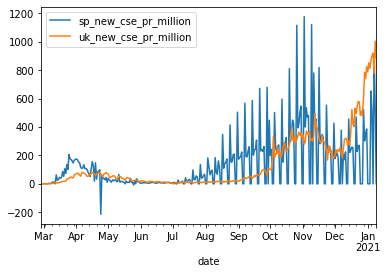

In [878]:
compare.plot(x="date", y=["sp_new_cse_pr_million", "uk_new_cse_pr_million"])

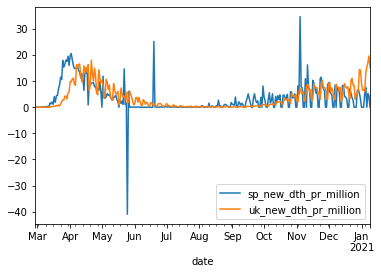

In [879]:
compare.plot(x="date", y=["sp_new_dth_pr_million", "uk_new_dth_pr_million"])

Check for null values

In [880]:
train.isnull().sum()

iso_code                                338
continent                               693
location                                  0
date                                      0
total_cases                             549
new_cases                               556
new_cases_smoothed                     1511
total_deaths                           8942
new_deaths                             8943
new_deaths_smoothed                    1511
total_cases_per_million                 887
new_cases_per_million                   894
new_cases_smoothed_per_million         1844
total_deaths_per_million               9267
new_deaths_per_million                 9268
new_deaths_smoothed_per_million        1844
reproduction_rate                     14135
icu_patients                          53001
icu_patients_per_million              53001
hosp_patients                         52263
hosp_patients_per_million             52263
weekly_icu_admissions                 58570
weekly_icu_admissions_per_millio

Impute missing values

In [881]:
train = train.drop(['date'], axis=1)

In [882]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [883]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [884]:
train.fillna(0,inplace=True)

Ordinal encoder

In [885]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [886]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [887]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [888]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
59125,34.0
59126,13.0
59127,15.0
59128,22.0


In [889]:
X

array([[-0.41572663, -1.70886554, -0.11158   , ..., -0.70567854,
        -0.88723051,  0.92462886],
       [-0.41572663, -1.70886554, -0.11161716, ..., -0.70567854,
        -0.88723051,  1.03690904],
       [-0.41572663, -1.70886554, -0.11161716, ..., -0.70567854,
        -0.88723051,  1.14918922],
       ...,
       [-1.02704978,  1.73223638, -0.07925314, ..., -1.01901093,
        -0.71109654, -0.9852569 ],
       [-1.02704978,  1.73223638, -0.0750172 , ..., -1.01901093,
        -0.71109654, -0.87297672],
       [-1.02704978,  1.73223638, -0.08044217, ..., -1.01901093,
        -0.71109654, -0.76069654]])

Split training file up for training and validation

In [890]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((53217, 42), (5913, 42), (53217, 1), (5913, 1))

Select model

In [891]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9956622019692695


Predict on validation set

In [892]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.8849657441818911
0.9998659075325861


(None, None)

In [893]:
y_val

,new_deaths
44225,0.0
26341,5.0
55235,0.0
39204,2.0
1422,2.0
...,...
34436,353.0
42379,12.0
51267,5.0
22738,2.0


In [894]:
y_train.values

array([[ 0.],
       [ 4.],
       [ 0.],
       ...,
       [42.],
       [ 0.],
       [ 0.]])

In [895]:
y_pred

array([ 0,  0,  0, ..., 14,  0,  0])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


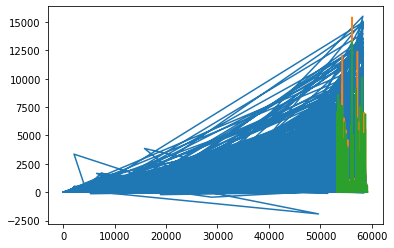

In [896]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [897]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,0.0,0
1,5.0,0
2,0.0,0
3,2.0,3
4,2.0,1
...,...,...
5908,353.0,267
5909,12.0,12
5910,5.0,14
5911,2.0,0


Create test dataset

In [898]:
test = last_date.copy()
test.date = today
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
320,AFG,Asia,Afghanistan,2021-01-10,53400.0,68.0,267.714,2264.0,7.0,10.429,1371.751,1.747,6.877,58.158,0.180,0.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,09012021
627,ALB,Europe,Albania,2021-01-10,63033.0,655.0,577.429,1233.0,3.0,6.143,21903.190,227.604,200.649,428.452,1.042,2.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,09012021
947,DZA,Africa,Algeria,2021-01-10,101913.0,256.0,250.571,2803.0,5.0,4.857,2324.072,5.838,5.714,63.921,0.114,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,09012021
1261,AND,Europe,Andorra,2021-01-10,8586.0,97.0,60.000,85.0,1.0,0.143,111124.054,1255.420,776.548,1100.110,12.942,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,09012021
1557,AGO,Africa,Angola,2021-01-10,18156.0,90.0,78.286,416.0,1.0,1.286,552.420,2.738,2.382,12.657,0.030,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,09012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57905,VNM,Asia,Vietnam,2021-01-10,1513.0,1.0,4.429,35.0,0.0,0.000,15.544,0.010,0.045,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,09012021
58259,OWID_WRL,NaN,World,2021-01-10,89634318.0,773818.0,719955.143,1926624.0,13205.0,12961.714,11499.247,99.274,92.364,247.168,1.694,1.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23561169.0,NaN,0.3,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,09012021
58535,YEM,Asia,Yemen,2021-01-10,2104.0,0.0,0.429,610.0,0.0,0.000,70.543,0.000,0.014,20.452,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,09012021
58833,ZMB,Africa,Zambia,2021-01-10,26567.0,1241.0,762.429,464.0,23.0,10.286,1445.119,67.505,41.472,25.239,1.251,0.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,

Convert date to number

In [899]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
320,AFG,Asia,Afghanistan,2021-01-10,53400.0,68.0,267.714,2264.0,7.0,10.429,1371.751,1.747,6.877,58.158,0.180,0.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,10012021
627,ALB,Europe,Albania,2021-01-10,63033.0,655.0,577.429,1233.0,3.0,6.143,21903.190,227.604,200.649,428.452,1.042,2.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,10012021
947,DZA,Africa,Algeria,2021-01-10,101913.0,256.0,250.571,2803.0,5.0,4.857,2324.072,5.838,5.714,63.921,0.114,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,10012021
1261,AND,Europe,Andorra,2021-01-10,8586.0,97.0,60.000,85.0,1.0,0.143,111124.054,1255.420,776.548,1100.110,12.942,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,10012021
1557,AGO,Africa,Angola,2021-01-10,18156.0,90.0,78.286,416.0,1.0,1.286,552.420,2.738,2.382,12.657,0.030,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,10012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57905,VNM,Asia,Vietnam,2021-01-10,1513.0,1.0,4.429,35.0,0.0,0.000,15.544,0.010,0.045,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,10012021
58259,OWID_WRL,NaN,World,2021-01-10,89634318.0,773818.0,719955.143,1926624.0,13205.0,12961.714,11499.247,99.274,92.364,247.168,1.694,1.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23561169.0,NaN,0.3,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,10012021
58535,YEM,Asia,Yemen,2021-01-10,2104.0,0.0,0.429,610.0,0.0,0.000,70.543,0.000,0.014,20.452,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,10012021
58833,ZMB,Africa,Zambia,2021-01-10,26567.0,1241.0,762.429,464.0,23.0,10.286,1445.119,67.505,41.472,25.239,1.251,0.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,

Check for null values

In [900]:
test.isnull().sum()

iso_code                                1
continent                               2
location                                0
date                                    0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                           14
new_deaths                             14
new_deaths_smoothed                     0
total_cases_per_million                 1
new_cases_per_million                   1
new_cases_smoothed_per_million          1
total_deaths_per_million               15
new_deaths_per_million                 15
new_deaths_smoothed_per_million         1
reproduction_rate                     191
icu_patients                          191
icu_patients_per_million              191
hosp_patients                         191
hosp_patients_per_million             191
weekly_icu_admissions                 191
weekly_icu_admissions_per_million     191
weekly_hosp_admissions            

Impute missing values

In [901]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [902]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [903]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [904]:
test.fillna(0,inplace=True)

In [905]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
320,AFG,Asia,Afghanistan,53400.0,68.0,267.714,2264.0,7.0,10.429,1371.751,1.747,6.877,58.158,0.180,0.268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498,10012021
627,ALB,Europe,Albania,63033.0,655.0,577.429,1233.0,3.0,6.143,21903.190,227.604,200.649,428.452,1.042,2.135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785,10012021
947,DZA,Africa,Algeria,101913.0,256.0,250.571,2803.0,5.0,4.857,2324.072,5.838,5.714,63.921,0.114,0.111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,10012021
1261,AND,Europe,Andorra,8586.0,97.0,60.000,85.0,1.0,0.143,111124.054,1255.420,776.548,1100.110,12.942,1.849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858,10012021
1557,AGO,Africa,Angola,18156.0,90.0,78.286,416.0,1.0,1.286,552.420,2.738,2.382,12.657,0.030,0.039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581,10012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57905,VNM,Asia,Vietnam,1513.0,1.0,4.429,35.0,0.0,0.000,15.544,0.010,0.045,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,10012021
58259,OWID_WRL,Not Listed,World,89634318.0,773818.0,719955.143,1926624.0,13205.0,12961.714,11499.247,99.274,92.364,247.168,1.694,1.663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,23561169.0,0.0,0.3,0.0,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,10012021
58535,YEM,Asia,Yemen,2104.0,0.0,0.429,610.0,0.0,0.000,70.543,0.000,0.014,20.452,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,10012021
58833,ZMB,Africa,Zambia,26567.0,1241.0,762.429,464.0,23.0,10.286,1445.119,67.505,41.472,25.239,1.251,0.559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,1.838396e+07,22.995,17.7,2.

Ordinal encoder

In [906]:
test_country = test.location
test_country

320      Afghanistan
627          Albania
947          Algeria
1261         Andorra
1557          Angola
            ...     
57905        Vietnam
58259          World
58535          Yemen
58833         Zambia
59129       Zimbabwe
Name: location, Length: 191, dtype: object

In [907]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [908]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [909]:
X_test = scaler.transform(X_test)

In [910]:
X_test

array([[-0.41572663, -1.70886554, -0.10909046, ..., -0.70567854,
        -0.88723051, -0.64841636],
       [ 0.19559653, -1.6908493 , -0.08727912, ...,  0.58329965,
         0.47899783, -0.64841636],
       [-1.02704978, -1.67283306, -0.10210489, ...,  0.42475721,
         0.33142613, -0.64841636],
       ...,
       [-0.41572663,  1.67818766, -0.11161716, ..., -0.58466093,
        -1.10620787, -0.64841636],
       [-1.02704978,  1.6962039 , -0.06550493, ..., -0.7938619 ,
        -0.45879653, -0.64841636],
       [-1.02704978,  1.71422014, -0.08044217, ..., -1.01901093,
        -0.71109654, -0.64841636]])

Predict on test set

In [911]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(191,)

Put Predictions in dataframe

In [912]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2021-01-10,6
1,Albania,2021-01-10,10
2,Algeria,2021-01-10,9
3,Andorra,2021-01-10,1
4,Angola,2021-01-10,1
...,...,...,...
186,Vietnam,2021-01-10,0
187,World,2021-01-10,11850
188,Yemen,2021-01-10,0
189,Zambia,2021-01-10,0
